$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Ejercicio práctico | Ejercicio de clasificación, visualización y pre-procesamiento de datos}$$

_Profesor: Moisés Meza, Jesus Alvarado_

_Alumnos: Luis Revilla, Sebastian Ríos, Emilio Ochoa_

**Siderophores database:**

This database is made up of 221 siderophores and includes the name of the compound, the associated microorganism, the type and number of chelating groups it contains (such as hydroxamate, catecholate, a-hydroxycarboxylate, carboxylate, phenolate, citrate, other* ), and the molecular representations SMILES, SMARTS and SELFIES (Siderophore_DB.csv). Descriptors: The files Siderophore_DB1, Siderophore_DB2 and Siderophore_DB3 include molecular RDKit (119), Morgan fingerprints (2049) and Mordred (1827), respectively.



2023. [Online] Disponible en: https://github.com/inefable12/siderophores_database


Cargamos las librerías Numpy, Matplotlib, Seaborn y Pandas para el manejo de datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Descargamos las bases de datos de Siderophores

In [ ]:
!gdown https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv
!gdown https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv
!gdown https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB2.csv
!gdown https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB3.csv

!pip -q install lazypredict

Downloading...
From: https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv
To: /content/Siderophore_DB.csv
172kB [00:00, 104MB/s]         
Downloading...
From: https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv
To: /content/Siderophore_DB1.csv
326kB [00:00, 16.6MB/s]       
Downloading...
From: https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB2.csv
To: /content/Siderophore_DB2.csv
923kB [00:00, 45.0MB/s]        
Downloading...
From: https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB3.csv
To: /content/Siderophore_DB3.csv
12.0MB [00:00, 80.8MB/s]


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Leemos los csv y creamos los dataframes: 4 en total

In [ ]:
#Importamos la data y creamos nuestro nuevo DataFrame de Pandas

df = pd.read_csv('Siderophore_DB.csv')
df1 = pd.read_csv('Siderophore_DB1.csv')
df2 = pd.read_csv('Siderophore_DB2.csv')
df3 = pd.read_csv('Siderophore_DB3.csv')

Leemos el dataframe df de Sidophore_DB para ver con qué variables nos encontramos

In [ ]:
# Una vez que lo tenemos, procedamos a analizar que informacion tiene
ID = pd.DataFrame(df['ID'])
df.head(10)

ID                      Compounds  \
0        1      2,3-dihydroxybenzoic acid   
1        2    2,3-dihydroxybenzoylglycine   
2        3     2,3-dihydroxybenzoylserine   
3        4  2,3-dihydroxybenzoylthreonine   
4        5          2-hydroxybenzoic acid   
5        6             2-N-methylcoprogen   
6  6_ChEBI             desferricoprogen B   
7        7           2-N-methylcoprogen B   
8        8      3,4-dihydroxybenzoic acid   
9        9           3,5-dihydroxybenzoic   

                                       Microorganism  hydroxamate  \
0  Azobacter vinelandii, Azospirillum lipoferum, ...            0   
1                                  Bacillus subtilis            0   
2  Aerobacter aerogenes, Escherichia ST2, Escheri...            0   
3                                 Klebsiella oxytoca            0   
4       Azospirillum lipoferum, Burkholderia cepacia            0   
5                                 Magnaporthe grisea            3   
6                                                NaN            3   
7  Histoplasma capsulatum, Magnaporthe grisea, Ps...            3   
8  Bacillus anthracis, Bacillus cereus, Bacillus ...            0   
9                             Azospirillum lipoferum            0   

   catecholate  a-hydroxycarboxylate  carboxylate  phenolate  citrate  other  \
0            1                     0            1          0        0      0   
1            1                     0            1          0        0      0   
2            1                     0            1          0        0      0   
3            1                     0            1          0        0      0   
4            0                     0            1          1        0      0   
5            0                     0            0          0        0      0   
6            0                     0            0          0        0      0   
7            0                     0            0          0        0      0   
8            1                     0            1          0        0      0   
9            0                     0            1          1        0      0   

                                              SMILES  validate smiles  \
0                               OC(=O)c1c(O)c(O)ccc1             True   
1                        c1ccc(O)c(O)c1C(=O)NCC(O)=O             True   
2               OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1             True   
3          O[C@H](C)[C@@H](C(O)=O)NC(=O)c1cccc(O)c1O             True   
4                                  OC(=O)c1c(O)cccc1             True   
5  OCC\C(C)=C\C(=O)N(O)CCC[C@H](N(C)C(=O)C)C(=O)O...             True   
6  OCC\C(C)=C\C(=O)N(O)CCC[C@H](N)C(=O)OCCC(\C)=C...             True   
7  OCC\C(C)=C\C(=O)N(O)CCC[C@H](NC)C(=O)OCCC(\C)=...             True   
8                               c1cc(O)c(O)cc1C(O)=O             True   
9                               Oc(c1)cc(O)cc1C(O)=O             True   

                                              SMARTS  \
0  [#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...   
1  [#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...   
2  [#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...   
3  [#8]-[#6@H](-[#6])-[#6@@H](-[#6](-[#8])=[#8])-...   
4  [#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6]:[#6]:[...   
5  [#8]-[#6]-[#6]/[#6](-[#6])=[#6]/[#6](=[#8])-[#...   
6  [#8]-[#6]-[#6]/[#6](-[#6])=[#6]/[#6](=[#8])-[#...   
7  [#8]-[#6]-[#6]/[#6](-[#6])=[#6]/[#6](=[#8])-[#...   
8  [#6]1:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:[#6]:1...   
9  [#8]-[#6]1:[#6]:[#6](:[#6]:[#6](:[#6]:1)-[#8])...   

                                             SELFIES  
0  [O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...  
1  [C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...  
2  [O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...  
3  [O][C@H1][Branch1][C][C][C@@H1][Branch1][=Bran...  
4  [O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...  
5  [O][C][C][\C][Branch1][C][C][=C][\C][=Branch1]...  
6  [O][C][C][\C][Branch1][C][C][=C][\C][=Branch1]...  
7  [O][C][

Hacemos lo mismo con df1

In [ ]:
df1.head(10)

ID  MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
0        1       11.191262       -1.343472          11.191262   
1        2       12.228676       -3.436129          12.228676   
2        3       12.627825       -3.816337          12.627825   
3        4       12.854441       -4.102795          12.854441   
4        5       11.108779       -1.310880          11.108779   
5        6       14.637926       -6.027201          14.637926   
6  6_ChEBI       14.204271       -5.464974          14.204271   
7        7       14.235765       -5.588196          14.235765   
8        8       11.137569       -1.330249          11.137569   
9        9       11.158190       -1.336481          11.158190   

   MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  ExactMolWt  \
0           0.665370  0.522491  154.121         148.073  154.026609   
1           0.586755  0.522624  211.173         202.101  211.048072   
2           0.758838  0.442264  241.199         230.111  241.058637   
3           0.884463  0.468346  255.226         242.122  255.074287   
4           0.630759  0.610259  138.122         132.074  138.031694   
5           1.541309  0.030202  782.889         724.425  782.406186   
6           1.515272  0.029440  726.825         672.393  726.379971   
7           1.524537  0.028291  740.852         684.404  740.395621   
8           0.628212  0.522491  154.121         148.073  154.026609   
9           0.663287  0.558539  154.121         148.073  154.026609   

   NumValenceElectrons  ...  fr_NH0  fr_NH1  fr_NH2  fr_N_O  fr_amide  \
0                   58  ...       0       0       0       0         0   
1                   80  ...       0       1       0       0         1   
2                   92  ...       0       1       0       0         1   
3                   98  ...       0       1       0       0         1   
4                   52  ...       0       0       0       0         0   
5                  310  ...       4       2       0       6         6   
6                  288  ...       3       2       1       6         5   
7                  294  ...       3       3       0       6         5   
8                   58  ...       0       0       0       0         0   
9                   58  ...       0       0       0       0         0   

   fr_benzene  fr_ester  fr_para_hydroxylation  fr_phenol  \
0           1         0                      1          2   
1           1         0                      1          2   
2           1         0                      1          2   
3           1         0                      1          2   
4           1         0                      1          1   
5           0         1                      0          0   
6           0         1                      0          0   
7           0         1                      0          0   
8           1         0                      0          2   
9           1         0                      0          2   

   fr_phenol_noOrthoHbond  
0                       1  
1                       2  
2                       2  
3                       2  
4                       0  
5                       0  
6                       0  
7                       0  
8                       2  
9                       2  

[10 rows x 119 columns]

Agregamos la columna ID a df2, sabiendo que todas tienen el mismo numero de observaciones

In [ ]:
df2.insert(loc=0, column='ID', value=ID)
df2 = df2.drop(['Unnamed: 0'], axis =1)
df2.head(10)

ID  Col_0  Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  \
0        1      0      0      0      0      0      0      0      0      0   
1        2      0      0      0      0      0      0      0      0      0   
2        3      0      1      0      0      0      0      0      0      0   
3        4      0      1      0      0      0      0      0      0      0   
4        5      0      0      0      0      0      0      0      0      0   
5        6      1      1      0      0      0      0      0      0      0   
6  6_ChEBI      0      1      0      0      0      0      0      0      0   
7        7      0      1      0      0      0      0      0      0      0   
8        8      0      0      0      0      0      0      0      0      0   
9        9      0      0      0      0      0      0      0      0      0   

   ...  Col_2038  Col_2039  Col_2040  Col_2041  Col_2042  Col_2043  Col_2044  \
0  ...         0         0         0         0         0         0         0   
1  ...         0         0         0         0         0         0         0   
2  ...         0         0         0         0         0         0         0   
3  ...         0         0         0         0         0         0         0   
4  ...         0         0         0         0         0         0         0   
5  ...         0         0         0         0         0         0         0   
6  ...         0         0         0         0         0         0         0   
7  ...         0         0         0         0         0         0         0   
8  ...         0         0         0         0         0         0         0   
9  ...         0         0         0         0         0         0         0   

   Col_2045  Col_2046  Col_2047  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0  
5         0         0         0  
6         0         0         0  
7         0         0         0  
8         0         0         0  
9         0         0         0  

[10 rows x 2049 columns]

De manera similar, agregamos la columna ID a df3

In [ ]:
df3.insert(loc=0, column='ID', value=ID)
df3 = df3.drop(['Unnamed: 0'], axis =1)
df3.head(10)

ID        ABC      ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A  \
0        1   8.094413   7.861189      1      0  13.168697  2.318335  4.636669   
1        2  11.032230  10.263086      1      0  18.097095  2.335155  4.670310   
2        3  12.406004  11.779674      1      0  20.564183  2.348305  4.696611   
3        4  13.291450  12.587729      1      0  21.314984  2.355933  4.711866   
4        5   7.318357   7.069195      1      0  11.945822  2.267184  4.534368   
5        6  40.208199  30.546122      0      0  65.377835  2.350434  4.700868   
6  6_ChEBI  37.241873  27.721941      0      1  60.683514  2.350422  4.700843   
7        7  37.839590  28.373369      0      1  62.186678  2.350423  4.700846   
8        8   8.134854   7.731889      1      0  13.152542  2.292456  4.584911   
9        9   8.175294   7.770338      1      0  12.617084  2.288246  4.576491   

      SpAD_A   SpMAD_A  ...      SRW10     TSRW10          MW       AMW  \
0  13.168697  1.197154  ...   9.148784  41.129752  154.026609  9.060389   
1  18.097095  1.206473  ...   9.344959  46.399340  211.048072  8.793670   
2  20.564183  1.209658  ...   9.531336  49.175108  241.058637  8.609237   
3  21.314984  1.184166  ...   9.632138  50.585433  255.074287  8.228203   
4  11.945822  1.194582  ...   8.912069  39.310842  138.031694  8.626981   
5  65.377835  1.188688  ...  10.503450  92.574433  782.406186  6.923949   
6  60.683514  1.189873  ...  10.380746  88.090742  726.379971  6.917904   
7  62.186678  1.195898  ...  10.402898  89.184474  740.395621  6.855515   
8  13.152542  1.195686  ...   9.071423  40.991311  154.026609  9.060389   
9  12.617084  1.147008  ...   9.038721  40.914174  154.026609  9.060389   

   WPath  WPol  Zagreb1  Zagreb2   mZagreb1   mZagreb2  
0    146    15     52.0     59.0   5.194444   2.500000  
1    386    20     70.0     78.0   6.805556   3.416667  
2    530    25     80.0     91.0   7.916667   3.944444  
3    612    27     86.0     98.0   8.777778   4.055556  
4    114    12     46.0     51.0   4.333333   2.305556  
5  18406    79    254.0    281.0  24.138889  12.722222  
6  15712    71    234.0    257.0  21.916667  11.833333  
7  16357    73    238.0    262.0  22.166667  12.166667  
8    152    14     52.0     58.0   5.194444   2.472222  
9    150    13     52.0     57.0   5.194444   2.444444  

[10 rows x 1827 columns]

Sabiendo que df2 tiene muchas variables que no podemos conocer sus características, es decir, no sabemos qué información dan, seleccionamos df1 y df3

In [ ]:
df_total = pd.merge(df, df1, how="inner", on="ID")
df_total = pd.merge(df_total, df3, how="inner", on="ID", suffixes=('_left', '_right'))


In [ ]:
df_suffix = df_total.filter(regex='(_left|_right)$')


En general, hay variables que explican lo mismo entre df1 y df3, por lo que seleccionamos finalmente solo df1

In [ ]:
df_suffix

BalabanJ_left  BertzCT_left  LabuteASA_left  PEOE_VSA1_left  \
0         3.676612    462.412521       71.030402       15.326425   
1         3.590699    682.108346       97.744639       20.636238   
2         3.771789    791.860329      111.800426       25.745046   
3         3.917883    880.730735      120.975309       25.745046   
4         3.638277    446.483683       66.149498       10.217616   
..             ...           ...             ...             ...   
216       2.685972   1892.431608      183.740912       14.923400   
217       1.886191   3176.083353      347.601153       46.095196   
218       1.886191   3176.083353      347.601153       46.095196   
219       1.888405   3280.479483      357.008678       45.723251   
220       1.886191   3176.083353      347.601153       46.095196   

     PEOE_VSA10_left  PEOE_VSA11_left  PEOE_VSA12_left  PEOE_VSA13_left  \
0           5.563451        11.499024         0.000000         4.293599   
1           6.496860        12.910866         0.000000        10.200779   
2           0.000000        18.928758         1.431200        10.200779   
3           0.000000        18.928758         1.431200        10.200779   
4          11.312963         0.000000         0.000000         2.862399   
..               ...              ...              ...              ...   
216        11.387856         1.411842         5.879988         0.000000   
217        29.255644        27.989635         5.601051        23.446338   
218        29.255644        27.989635         5.601051        23.446338   
219        29.255644        27.989635         5.601051        22.015138   
220        29.255644        27.989635         5.601051        23.446338   

     PEOE_VSA2_left  PEOE_VSA3_left  ...  EState_VSA9_right  \
0          0.000000        4.794537  ...          15.319582   
1          9.589074        0.000000  ...          10.213055   
2          4.794537        4.794537  ...          15.319582   
3          4.794537        4.794537  ...           5.106527   
4          0.000000        4.794537  ...          10.213055   
..              ...             ...  ...                ...   
216        4.794537        4.983979  ...           4.736863   
217       19.283521       14.573053  ...          22.172196   
218       19.283521       14.573053  ...          22.172196   
219       19.283521       14.573053  ...          26.909059   
220       19.283521       14.573053  ...          22.172196   

     EState_VSA10_right  VSA_EState1_right  VSA_EState2_right  \
0              4.794537           0.000000          10.302870   
1             14.695602           0.000000          21.436949   
2             14.695602           0.000000          22.097412   
3             24.908657           0.000000          22.453384   
4              4.794537           0.000000          10.261759   
..                  ...                ...                ...   
216           10.001790           5.894653          19.502985   
217           44.398795           0.469903          74.080712   
218           44.398795           0.469903          74.080712   
219           39.292268           5.586548          74.385751   
220           44.398795           0.469903          74.080712   

     VSA_EState3_right  VSA_EState4_right  VSA_EState5_right  \
0            26.191759          -0.300926          -2.288611   
1            28.718419          -0.170139          -2.951707   
2            37.831082          -0.273426          -3.443570   
3            38.655267          -0.276019          -3.452781   
4            17.305741          -0.067130          -1.311944   
..                 ...                ...                ...   
216          11.282625           4.481097           0.249672   
217          48.776357           3.890684          -5.516040   
218          48.776357           3.890684          -5.516040   
219          39.629279           4.093286          -4.529467   
220          48.776357           3.890684    

In [ ]:
df_total = pd.merge(df, df1, how="inner", on = "ID")

In [ ]:
df_total.shape

(221, 132)

In [ ]:
df_total.head(10)

ID                      Compounds  \
0        1      2,3-dihydroxybenzoic acid   
1        2    2,3-dihydroxybenzoylglycine   
2        3     2,3-dihydroxybenzoylserine   
3        4  2,3-dihydroxybenzoylthreonine   
4        5          2-hydroxybenzoic acid   
5        6             2-N-methylcoprogen   
6  6_ChEBI             desferricoprogen B   
7        7           2-N-methylcoprogen B   
8        8      3,4-dihydroxybenzoic acid   
9        9           3,5-dihydroxybenzoic   

                                       Microorganism  hydroxamate  \
0  Azobacter vinelandii, Azospirillum lipoferum, ...            0   
1                                  Bacillus subtilis            0   
2  Aerobacter aerogenes, Escherichia ST2, Escheri...            0   
3                                 Klebsiella oxytoca            0   
4       Azospirillum lipoferum, Burkholderia cepacia            0   
5                                 Magnaporthe grisea            3   
6                                                NaN            3   
7  Histoplasma capsulatum, Magnaporthe grisea, Ps...            3   
8  Bacillus anthracis, Bacillus cereus, Bacillus ...            0   
9                             Azospirillum lipoferum            0   

   catecholate  a-hydroxycarboxylate  carboxylate  phenolate  citrate  other  \
0            1                     0            1          0        0      0   
1            1                     0            1          0        0      0   
2            1                     0            1          0        0      0   
3            1                     0            1          0        0      0   
4            0                     0            1          1        0      0   
5            0                     0            0          0        0      0   
6            0                     0            0          0        0      0   
7            0                     0            0          0        0      0   
8            1                     0            1          0        0      0   
9            0                     0            1          1        0      0   

   ... fr_NH0  fr_NH1 fr_NH2 fr_N_O  fr_amide  fr_benzene  fr_ester  \
0  ...      0       0      0      0         0           1         0   
1  ...      0       1      0      0         1           1         0   
2  ...      0       1      0      0         1           1         0   
3  ...      0       1      0      0         1           1         0   
4  ...      0       0      0      0         0           1         0   
5  ...      4       2      0      6         6           0         1   
6  ...      3       2      1      6         5           0         1   
7  ...      3       3      0      6         5           0         1   
8  ...      0       0      0      0         0           1         0   
9  ...      0       0      0      0         0           1         0   

   fr_para_hydroxylation  fr_phenol  fr_phenol_noOrthoHbond  
0                      1          2                       1  
1                      1          2                       2  
2                      1          2                       2  
3                      1          2                       2  
4                      1          1                       0  
5                      0          0                       0  
6                      0          0                       0  
7                      0          0                       0  
8                      0          2                       2  
9                      0          2                       2  

[10 rows x 132 columns]

Listamos las columnas del dataframe

In [ ]:
# Vemos que una columna no tiene nombre, viendo el data set entero entendemos que es el id
# Como ya se nos genera esa informacion repetida, podemos dropear esa columna

df_total.columns

Index(['ID', 'Compounds', 'Microorganism', 'hydroxamate', 'catecholate',
       'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other',
       ...
       'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_amide', 'fr_benzene',
       'fr_ester', 'fr_para_hydroxylation', 'fr_phenol',
       'fr_phenol_noOrthoHbond'],
      dtype='object', length=132)

In [ ]:
# Contamos con 101 observaciones y 24 atributos

df_total.shape

(221, 132)

Vemos qué clases tienen las variables del dataframe

In [ ]:
# Tenemos que primero analizar y entender bien la informacion
# Vemos que en el data set, tenemos que las Comorbilidades ya esta encodeado
# En orden Diabetes Muscular Hipertension AtrialFib (genera numero de 4 bits)

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Columns: 132 entries, ID to fr_phenol_noOrthoHbond
dtypes: bool(1), float64(86), int64(39), object(6)
memory usage: 228.1+ KB


Verificamos si la columna 'Compounds' nos será util

In [ ]:
print(df_total['Compounds'].unique())

['2,3-dihydroxybenzoic acid' '2,3-dihydroxybenzoylglycine'
 '2,3-dihydroxybenzoylserine' '2,3-dihydroxybenzoylthreonine'
 '2-hydroxybenzoic acid' '2-N-methylcoprogen' 'desferricoprogen B'
 '2-N-methylcoprogen B' '3,4-dihydroxybenzoic acid' '3,5-dihydroxybenzoic'
 'achromobactin' 'acinetobactin' 'acinetoferrin' 'acyl-desferrioxamine 1'
 'acyl-desferrioxamine 2' 'acyl-desferrioxamine 3'
 'acyl-desferrioxamine 4' 'acyl-desferrioxamine 4_'
 'acyl-desferrioxamine 5' 'aerobactin' 'aeruginic acid' 'agrobactin'
 'agrobactin A' 'albomycin d1' 'alcaligin' 'alterobactin A'
 'alterobactin B' 'aminochelin' 'amonabactin P' 'amonabactin T'
 'amonabactin P693' 'amonabactin T732' 'amphibactin B' 'amphibactin C'
 'amphibactin D' 'amphibactin E' 'amphibactin F' 'amphibactin G'
 'amphibactin H' 'amphibactin I' 'Amychelin' 'amycolachrome'
 'anacheline-1' 'anacheline-2' 'anacheline-H' 'anguibactin' 'aquachelin A'
 'arthrobactin' 'asperchrome A' 'asperchrome B1' 'asperchrome B2'
 'asperchrome B3' 'asperchrom

# Revisar si hay NaNs

In [ ]:
# Revisemos los NaNs (si es que hay)

import missingno as msno

<Axes: >

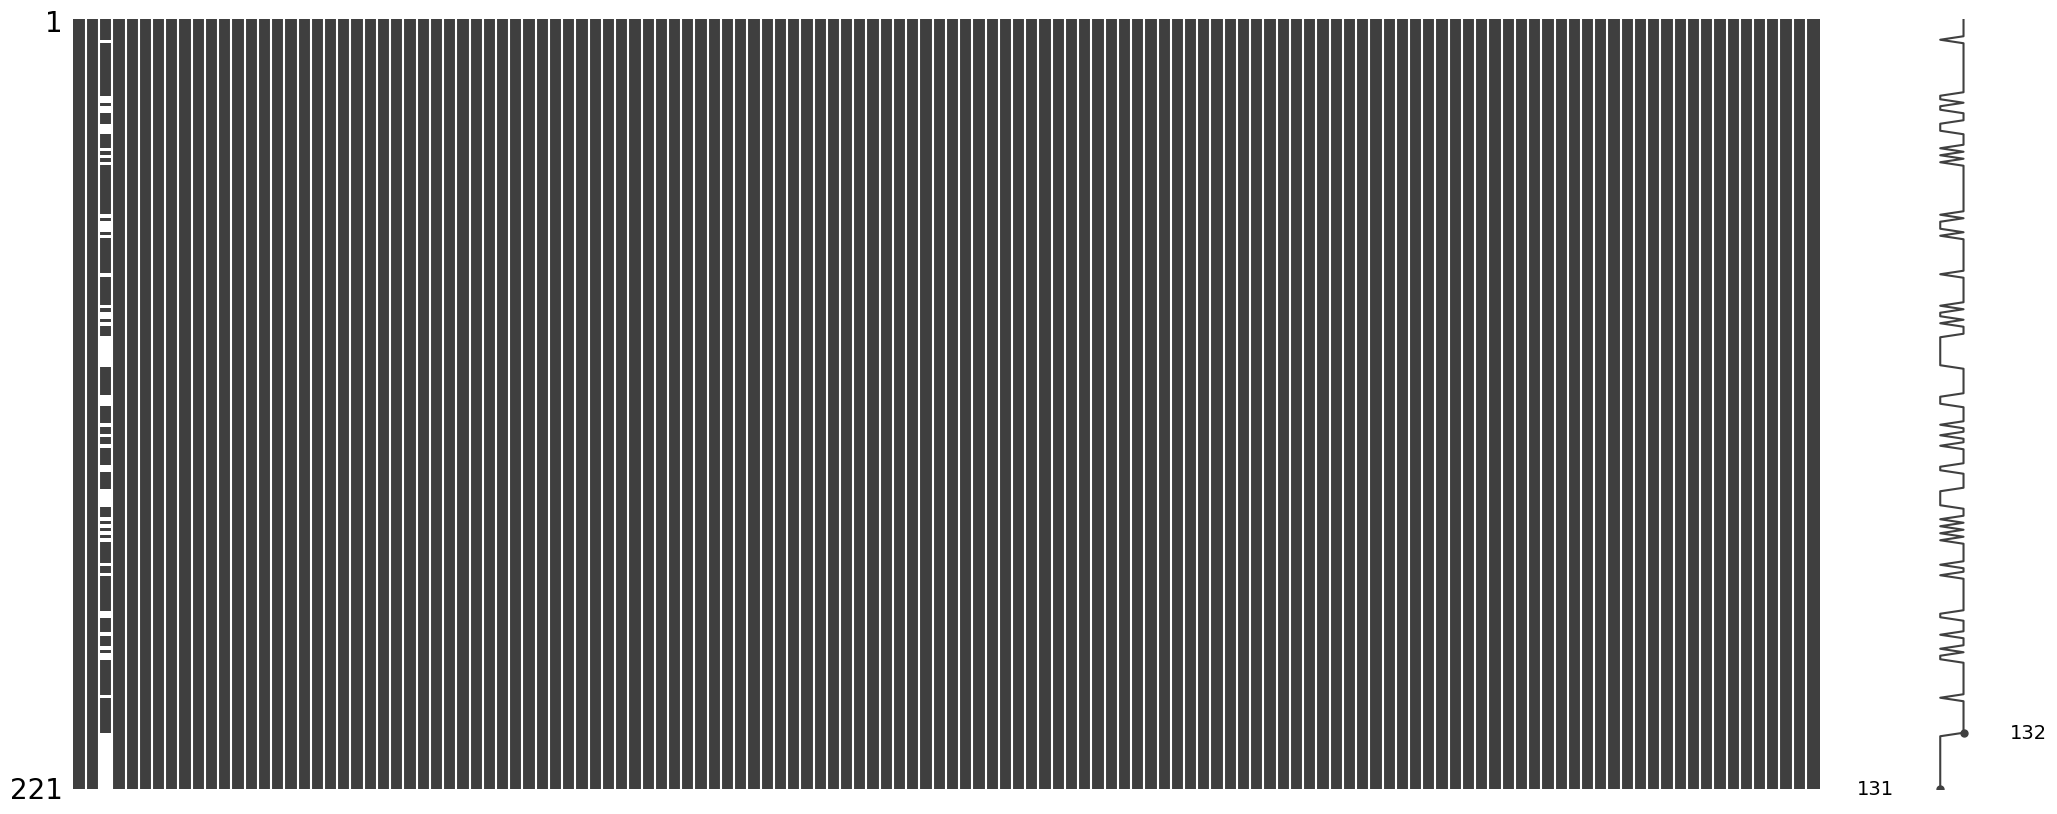

In [ ]:
msno.matrix(df_total)
# Tenemos 1 CERO en MWT1 en row aprox 50
# Tenemos 3 ceros en la ultima fila en los 3 MWTs

# Preprocesamiento

In [ ]:
df_total.head()

ID                      Compounds  \
0  1      2,3-dihydroxybenzoic acid   
1  2    2,3-dihydroxybenzoylglycine   
2  3     2,3-dihydroxybenzoylserine   
3  4  2,3-dihydroxybenzoylthreonine   
4  5          2-hydroxybenzoic acid   

                                       Microorganism  hydroxamate  \
0  Azobacter vinelandii, Azospirillum lipoferum, ...            0   
1                                  Bacillus subtilis            0   
2  Aerobacter aerogenes, Escherichia ST2, Escheri...            0   
3                                 Klebsiella oxytoca            0   
4       Azospirillum lipoferum, Burkholderia cepacia            0   

   catecholate  a-hydroxycarboxylate  carboxylate  phenolate  citrate  other  \
0            1                     0            1          0        0      0   
1            1                     0            1          0        0      0   
2            1                     0            1          0        0      0   
3            1                     0            1          0        0      0   
4            0                     0            1          1        0      0   

   ... fr_NH0  fr_NH1 fr_NH2 fr_N_O  fr_amide  fr_benzene  fr_ester  \
0  ...      0       0      0      0         0           1         0   
1  ...      0       1      0      0         1           1         0   
2  ...      0       1      0      0         1           1         0   
3  ...      0       1      0      0         1           1         0   
4  ...      0       0      0      0         0           1         0   

   fr_para_hydroxylation  fr_phenol  fr_phenol_noOrthoHbond  
0                      1          2                       1  
1                      1          2                       2  
2                      1          2                       2  
3                      1          2                       2  
4                      1          1                       0  

[5 rows x 132 columns]

Hacemos feature engineering juntando las columnas de los quelantes

In [ ]:
# Seleccionar las columnas a sumar
cols_to_sum = ['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other']

# Sumar las columnas en una nueva columna 'quelantes'
df_total['quelantes'] = df_total[cols_to_sum].apply(sum, axis=1)

Volvemos la columna quelantes de tipo categórica

In [ ]:
# Entonces ahora lo categorizamos
from pandas.api.types import CategoricalDtype

In [ ]:
# Crear un diccionario que mapee los valores a las nuevas categorías
cat_mapping = {0: 'other', 1: 'other', 2: '2', 3: '3', 4: '4', 5: 'other', 6:'other', 7:'other'}

# Crear una nueva variable 'quelantes_categ' con las categorías mapeadas
df_total['quelantes_categ'] = df_total['quelantes'].map(cat_mapping)

# Convertir la variable a una variable categórica
df_total['quelantes_categ'] = pd.Categorical(df_total['quelantes_categ'], categories=['other', '2', '3', '4'], ordered=True)

# Verificar las frecuencias de las categorías
print(df_total['quelantes_categ'].value_counts())

3        119
2         42
4         41
other     19
Name: quelantes_categ, dtype: int64


Verificamos la existencia de nulos

In [ ]:
nulos = df_total.isnull().sum()
print(nulos[nulos >= 1])

Microorganism    72
dtype: int64


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Columns: 134 entries, ID to quelantes_categ
dtypes: bool(1), category(1), float64(86), int64(40), object(6)
memory usage: 230.3+ KB


In [ ]:
df_total.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

['ID',
 'Compounds',
 'Microorganism',
 'SMILES',
 'validate smiles',
 'SMARTS',
 'SELFIES',
 'quelantes_categ']

Eliminamos las columnas que no nos vayan a servir

In [ ]:
df_total = df_total.drop(['ID', 'Compounds', 'Microorganism', 'SMILES', 'validate smiles', 'SMARTS', 'SELFIES'], axis=1)

In [ ]:
df_total.columns

Index(['ID', 'Compounds', 'Microorganism', 'hydroxamate', 'catecholate',
       'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other',
       ...
       'fr_NH2', 'fr_N_O', 'fr_amide', 'fr_benzene', 'fr_ester',
       'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond',
       'quelantes', 'quelantes_categ'],
      dtype='object', length=134)

# EDA

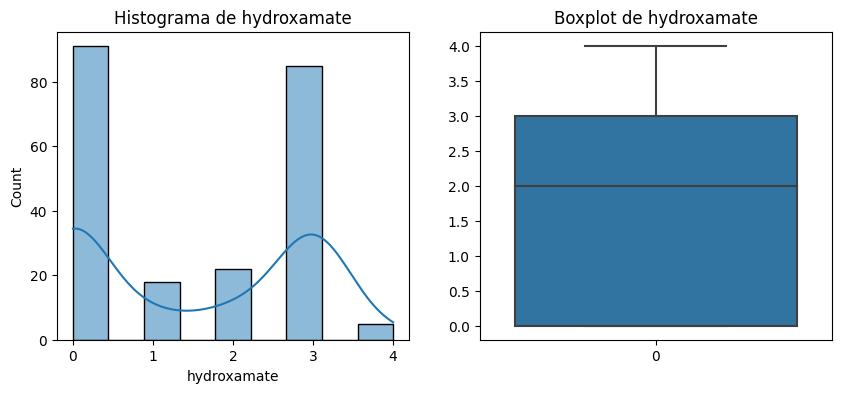

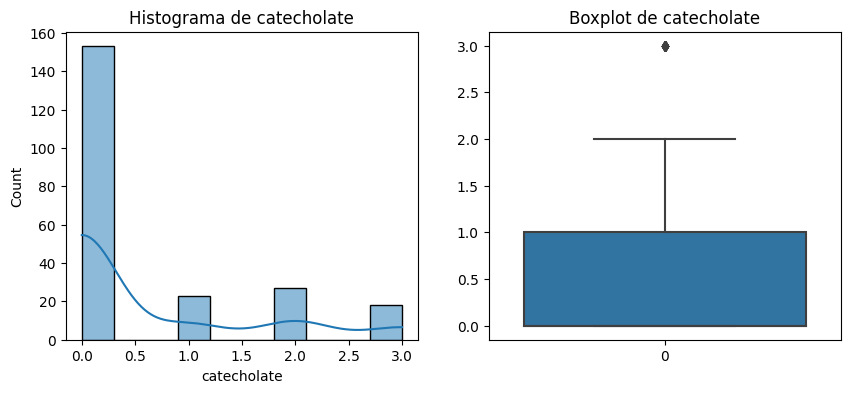

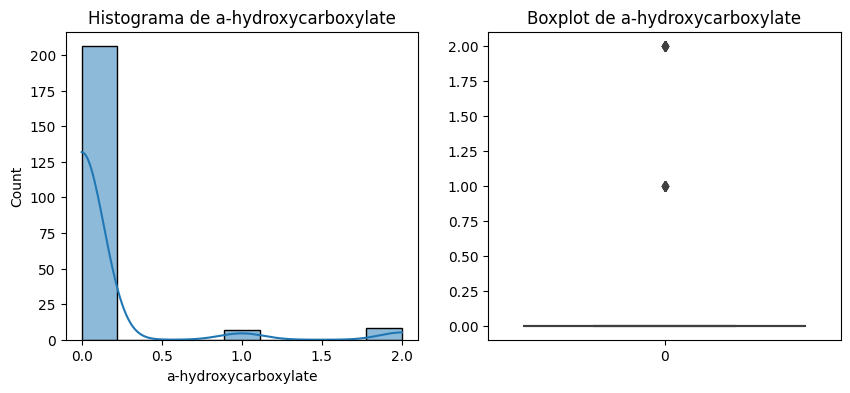

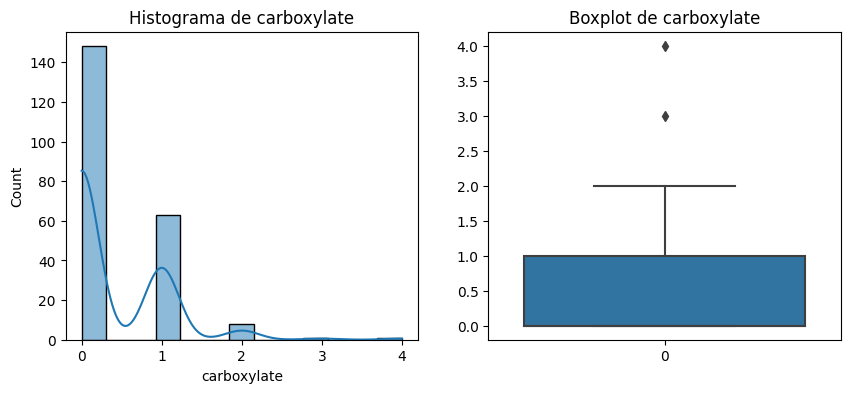

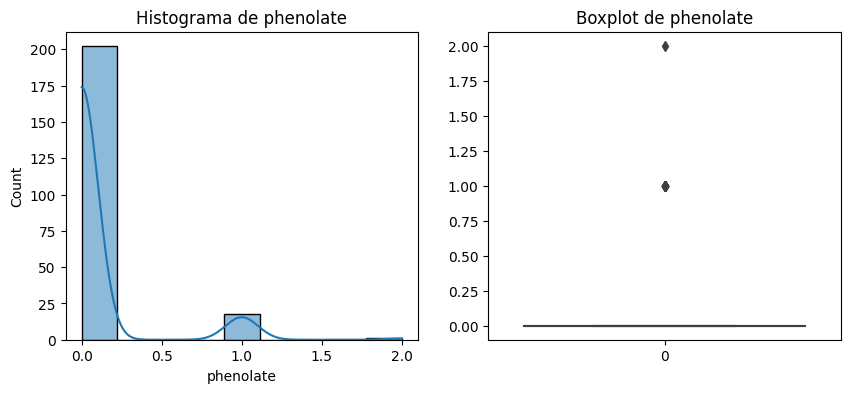

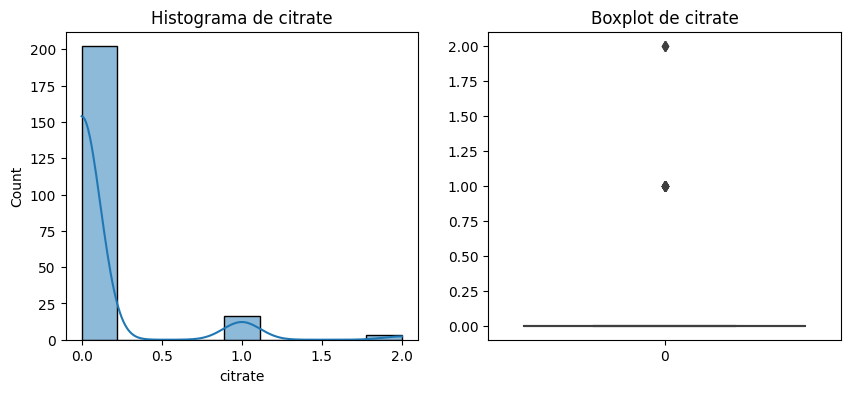

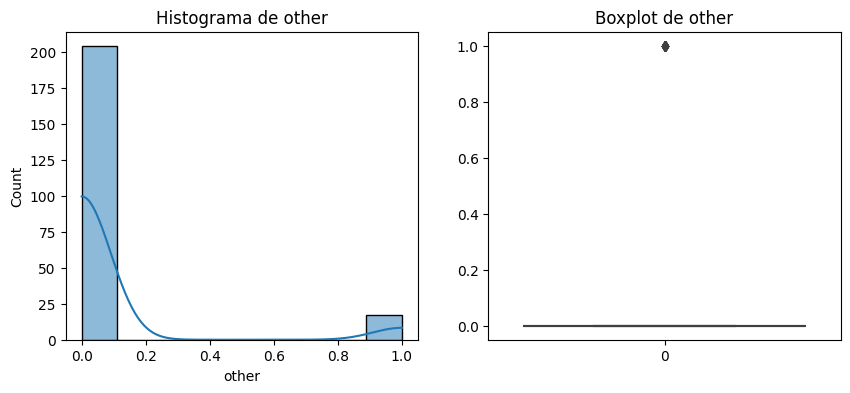

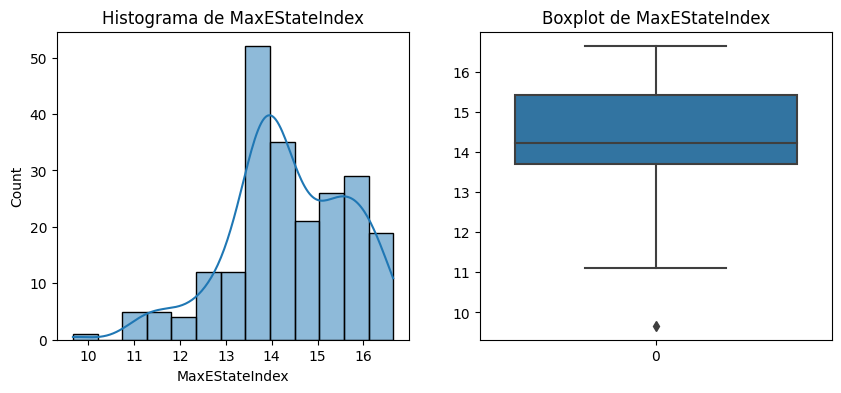

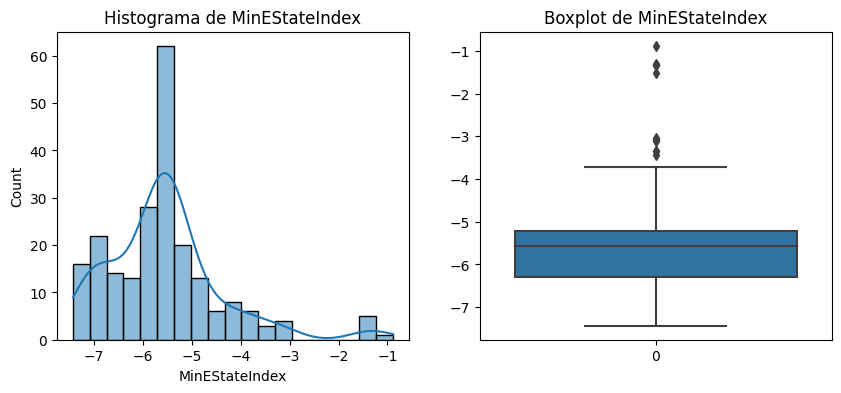

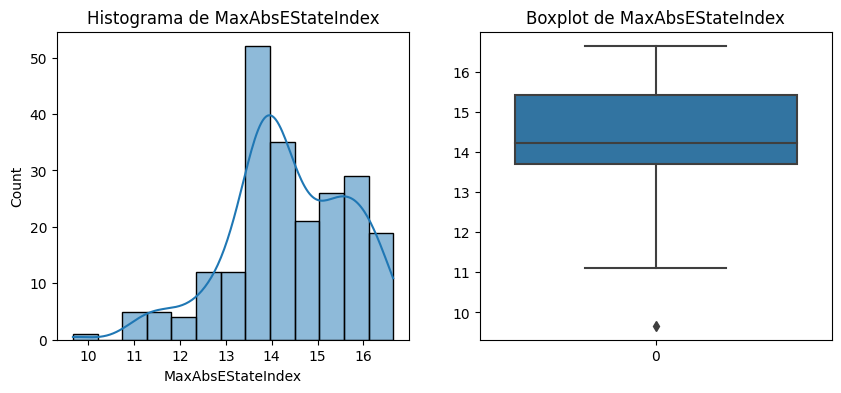

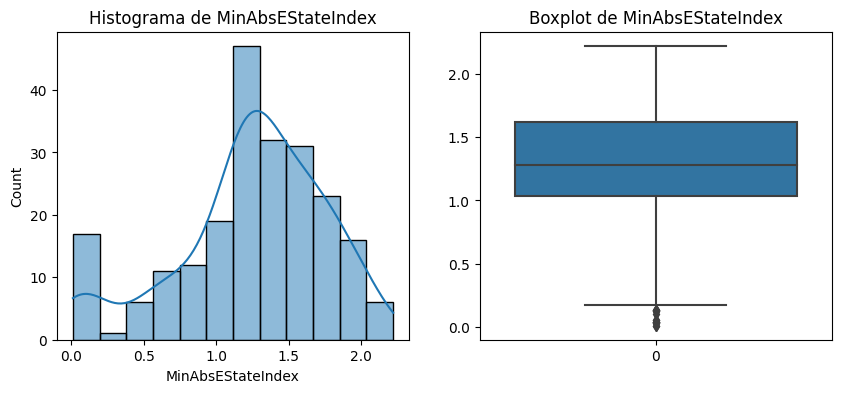

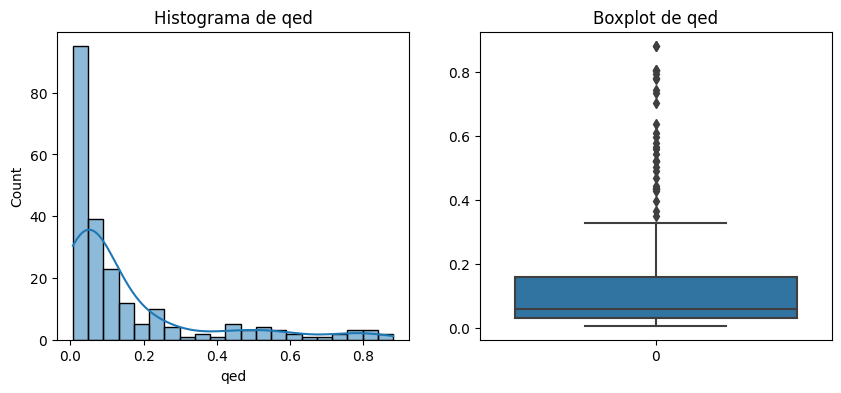

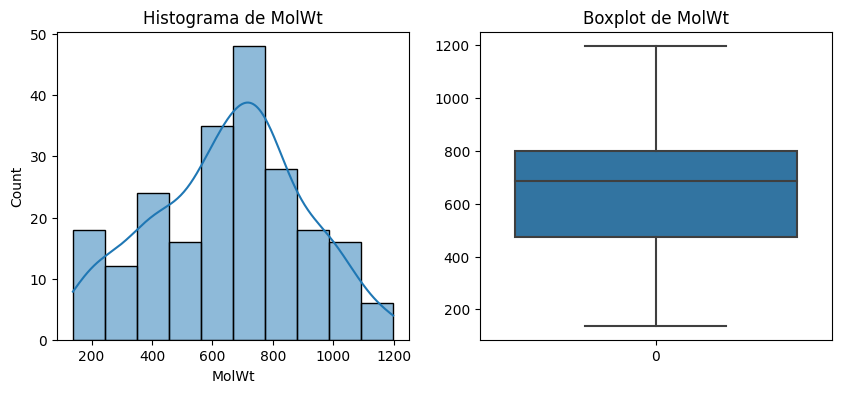

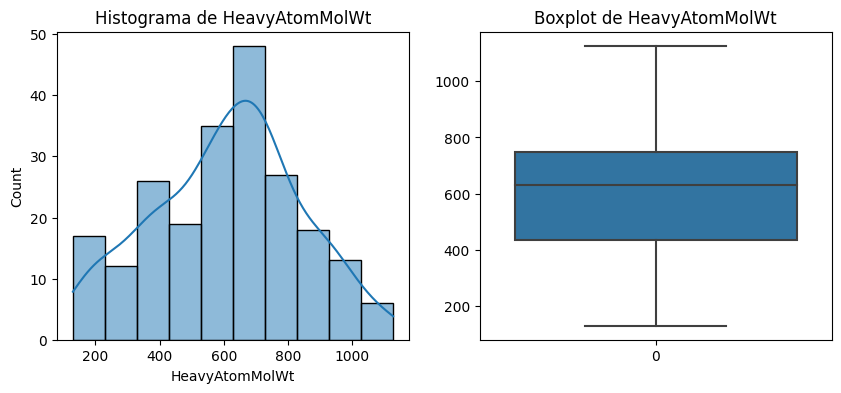

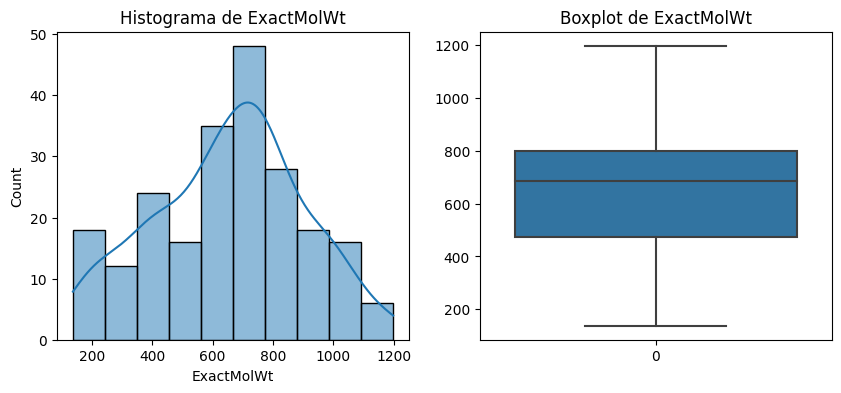

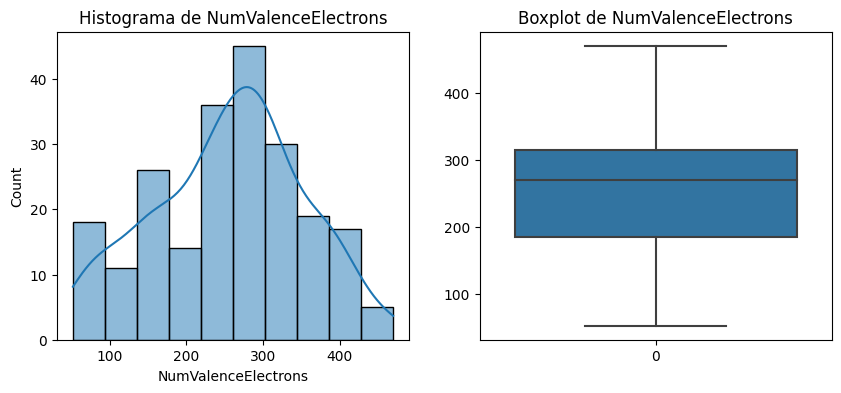

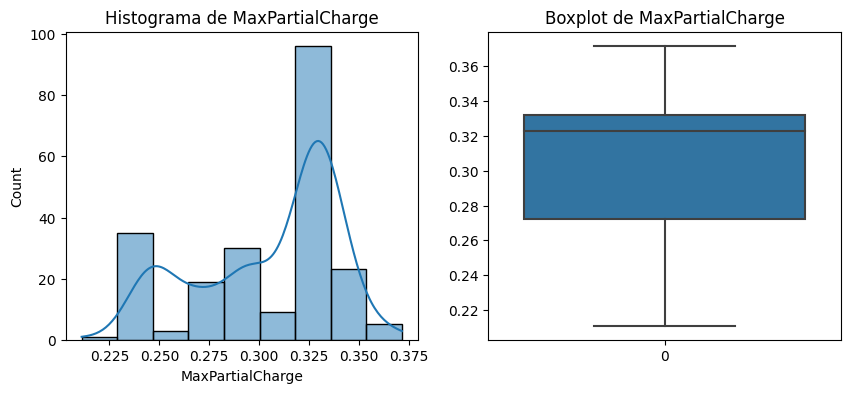

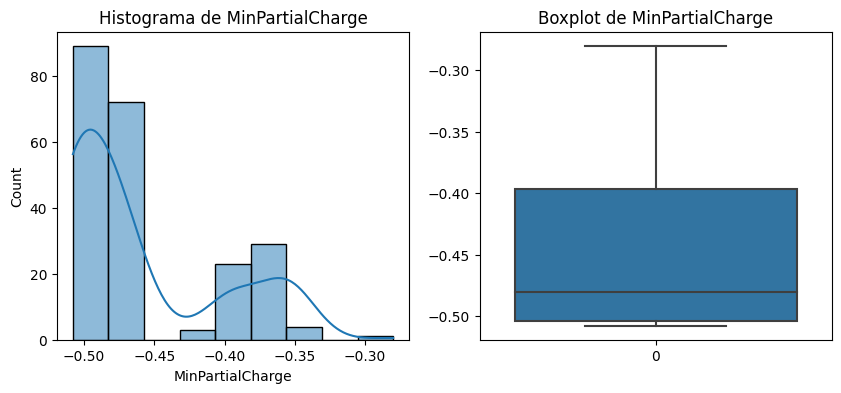

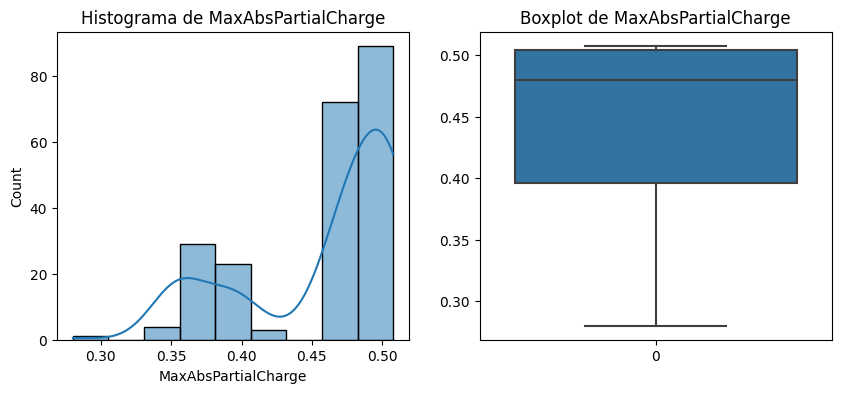

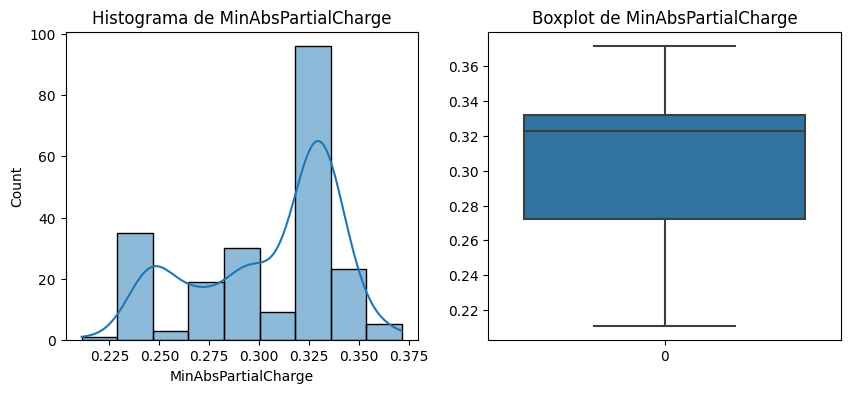

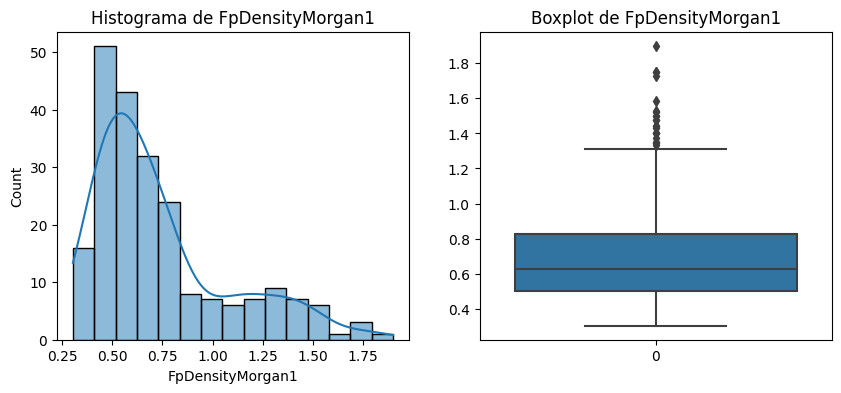

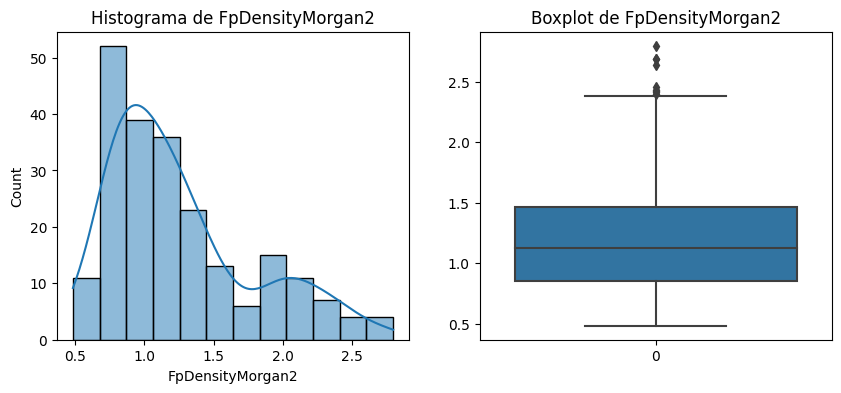

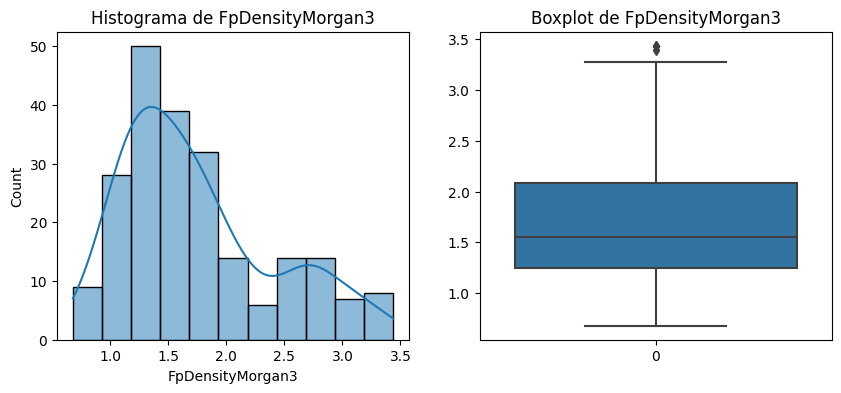

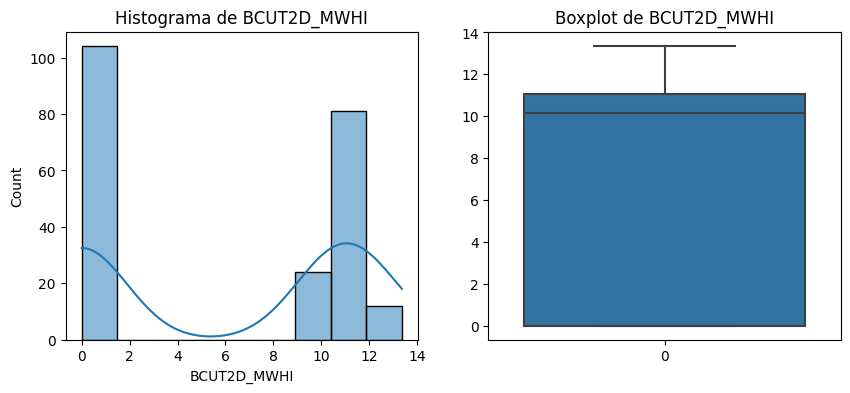

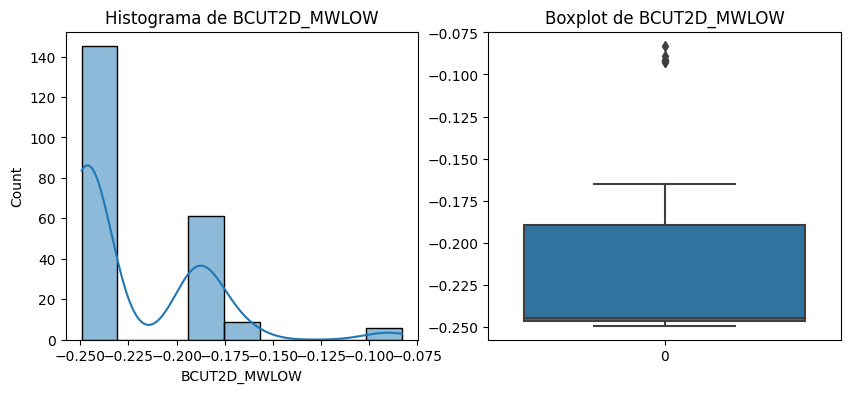

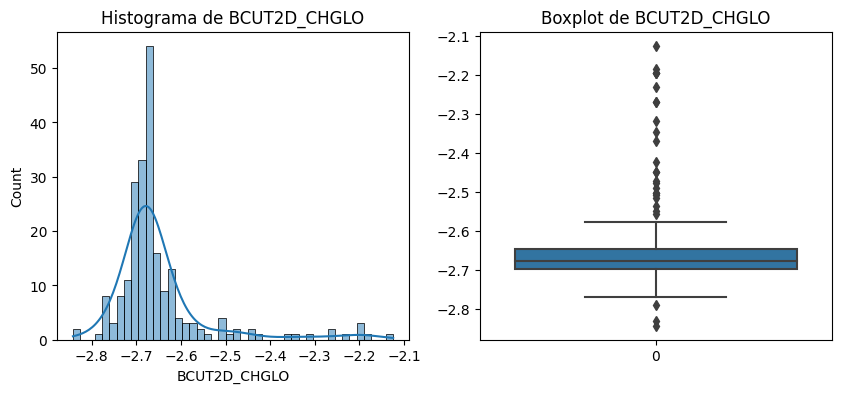

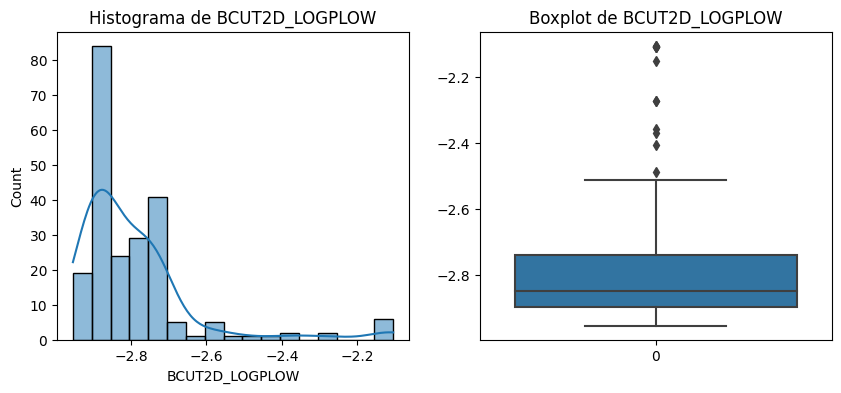

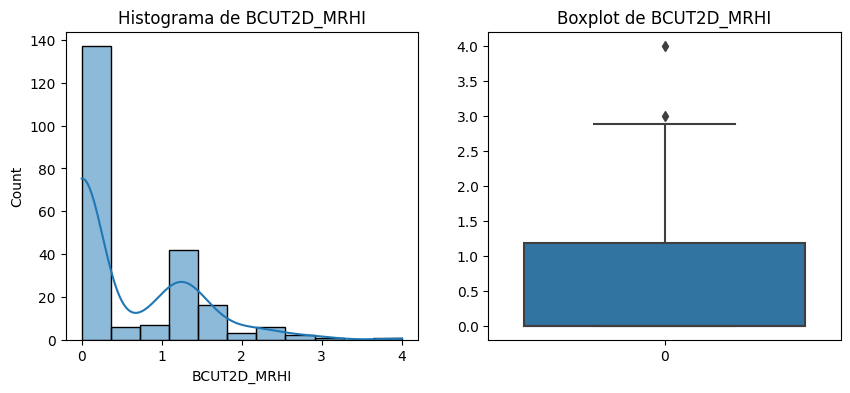

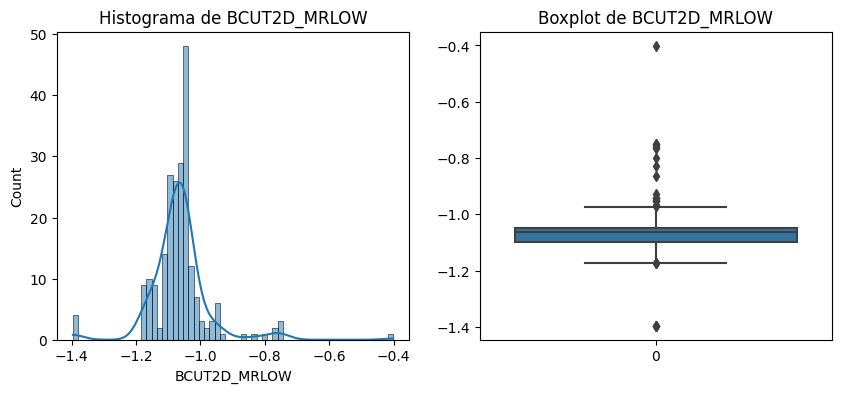

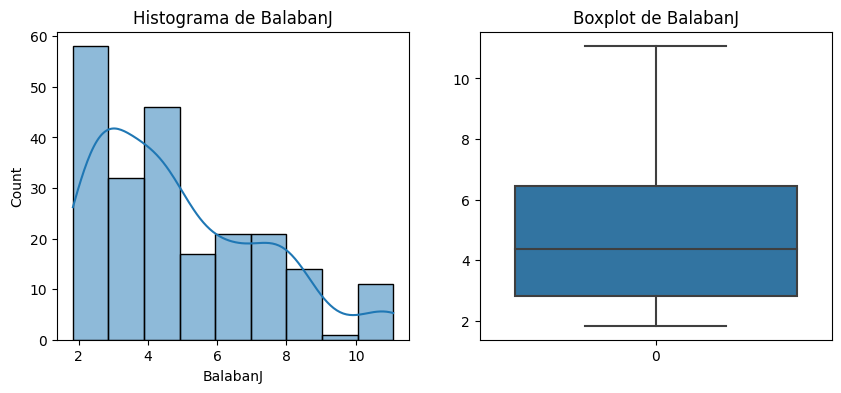

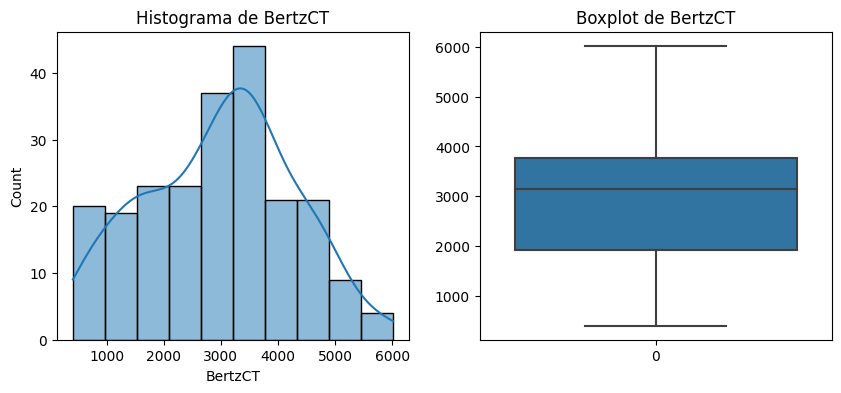

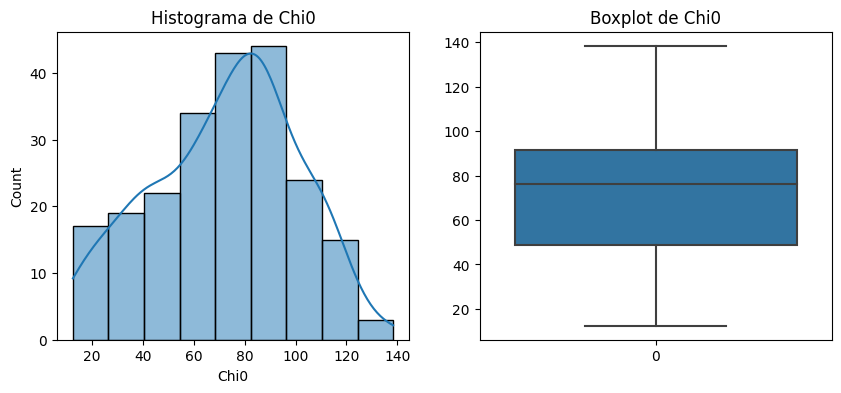

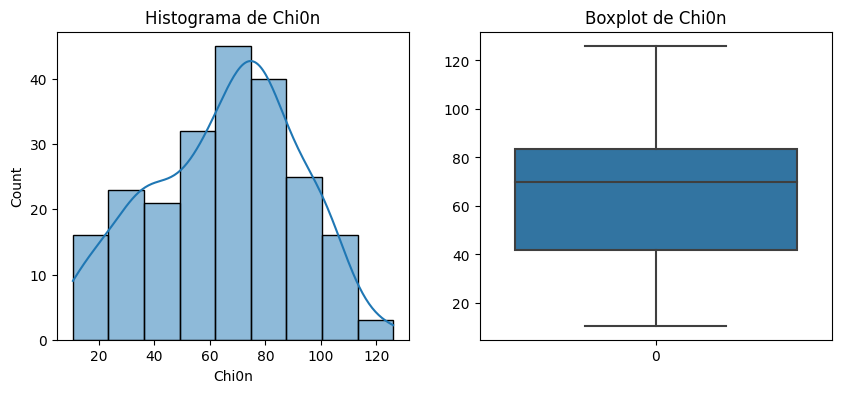

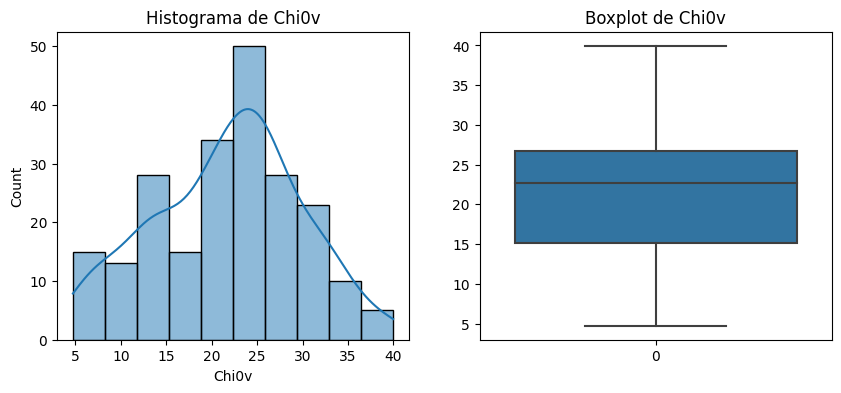

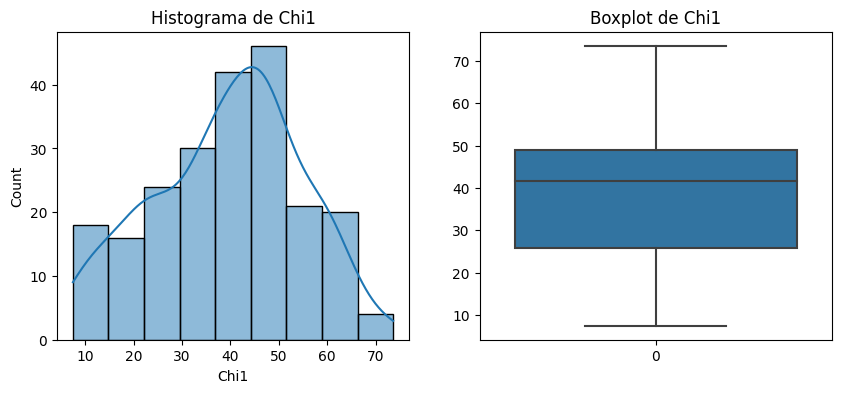

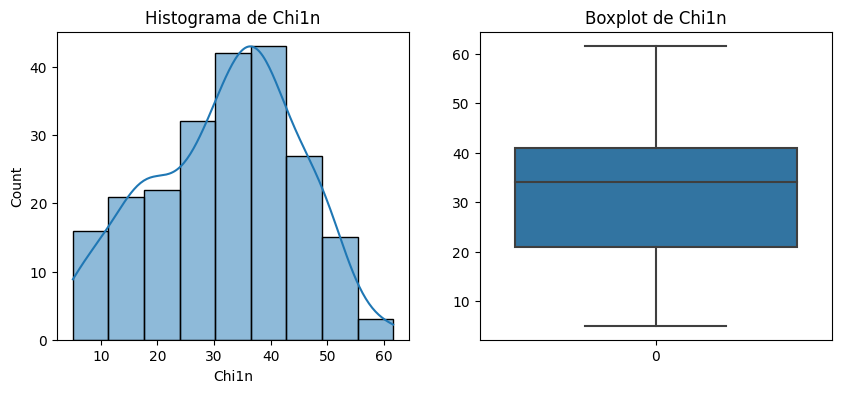

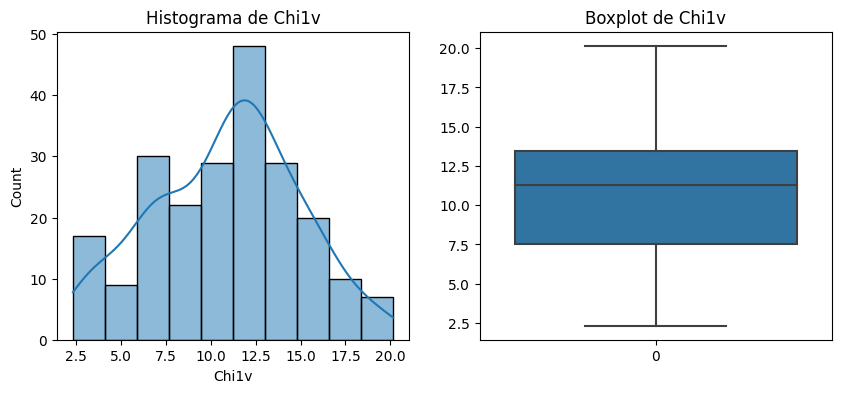

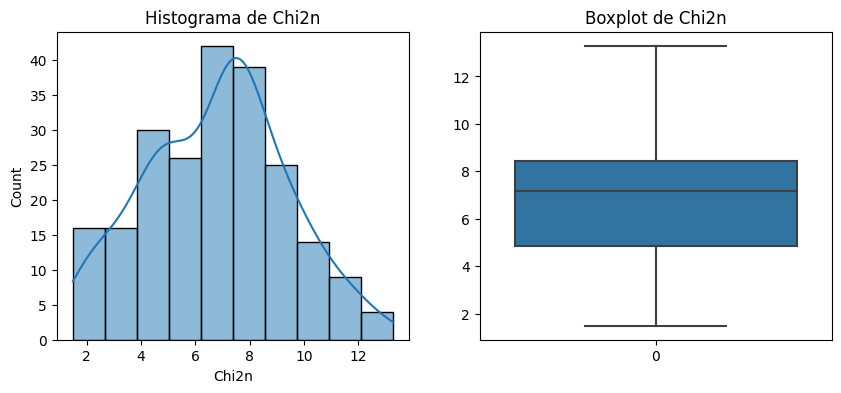

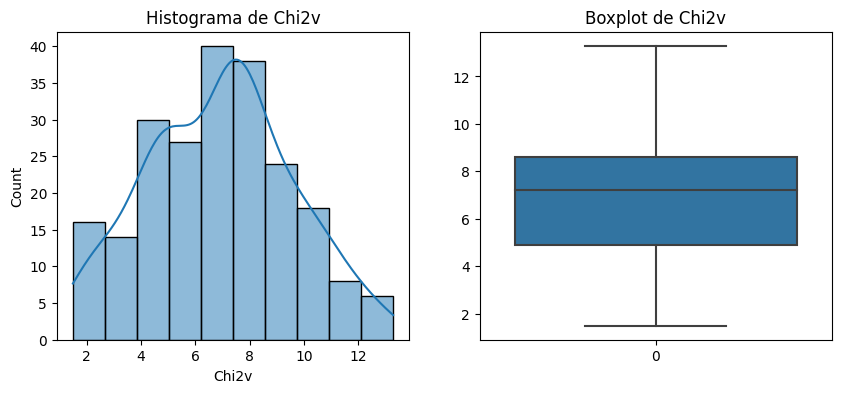

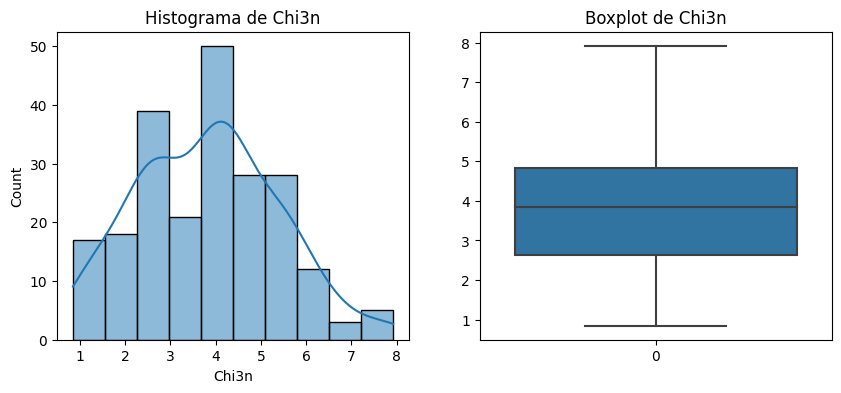

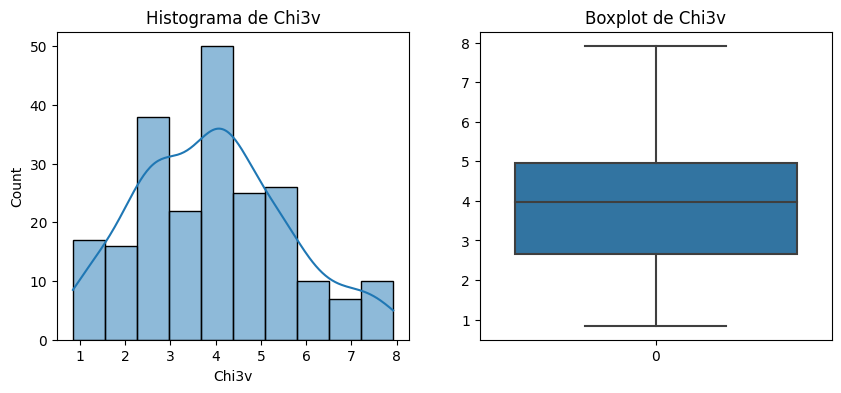

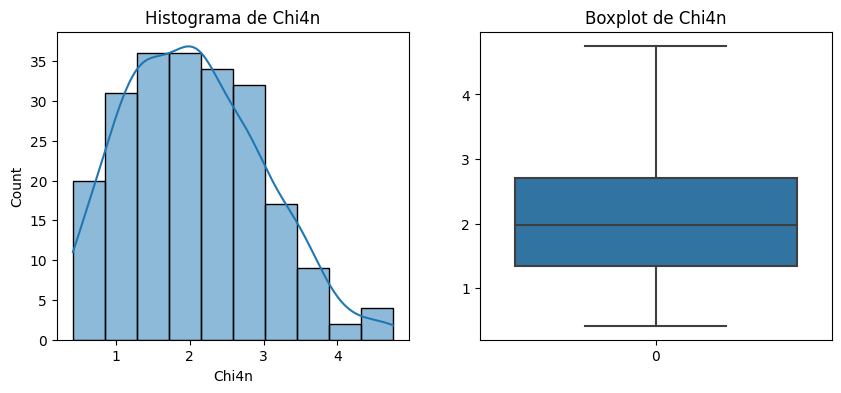

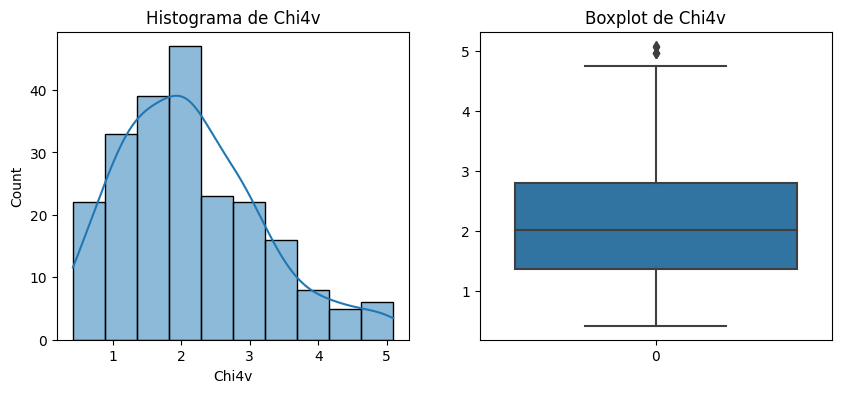

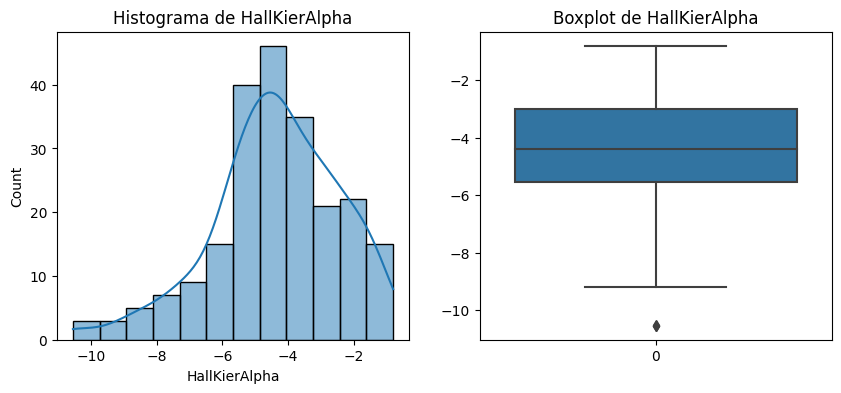

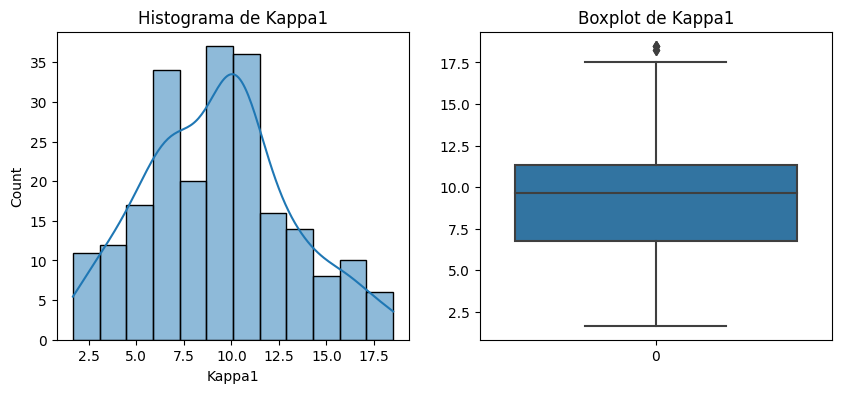

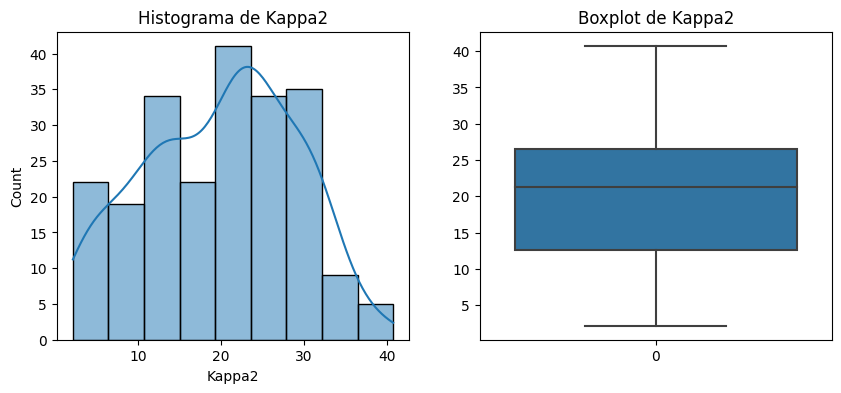

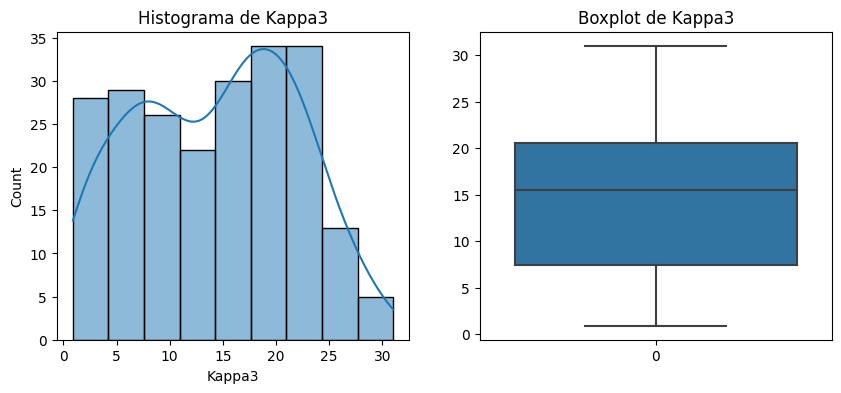

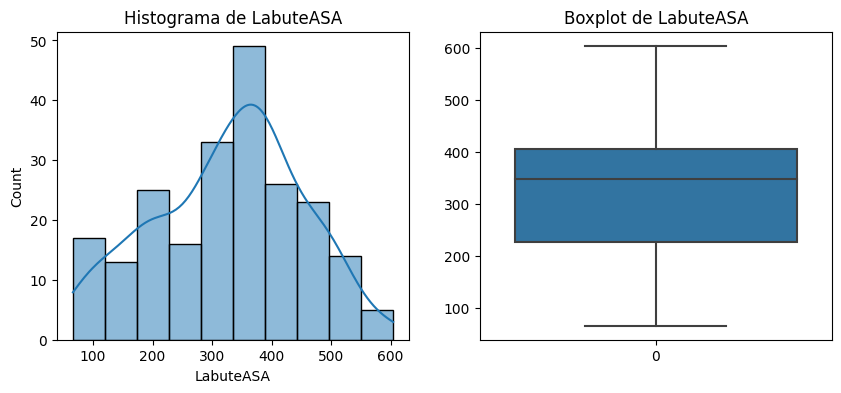

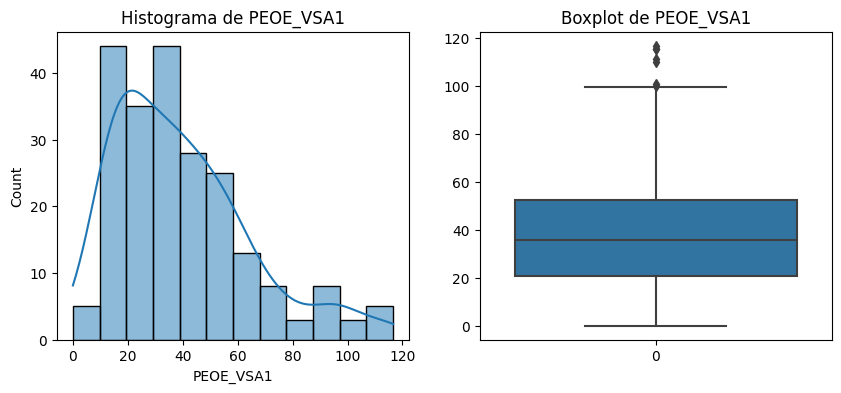

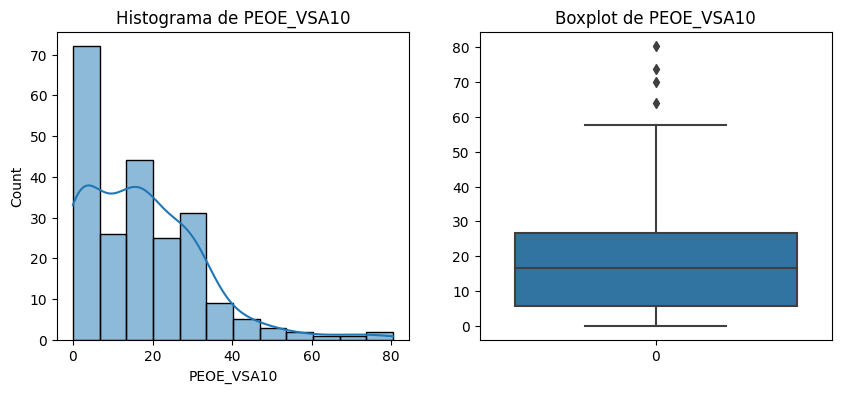

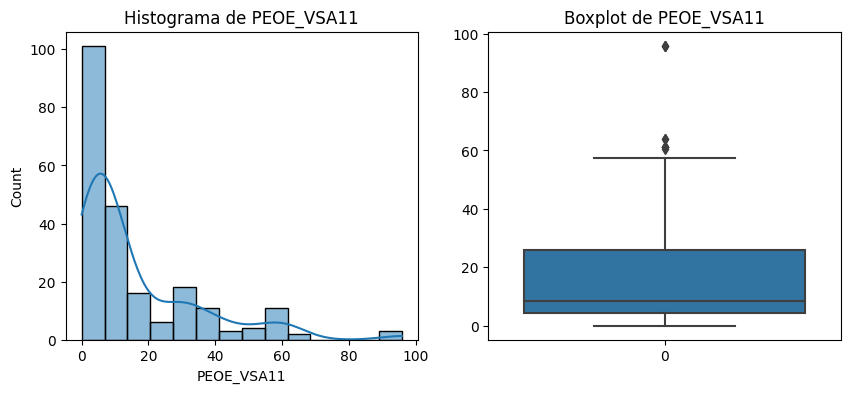

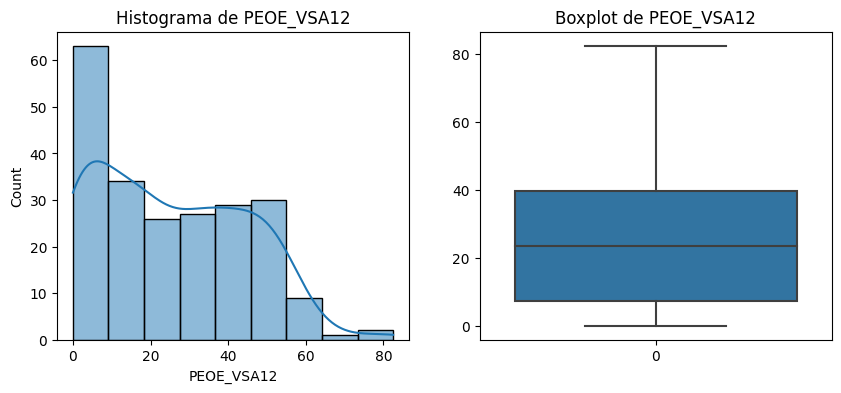

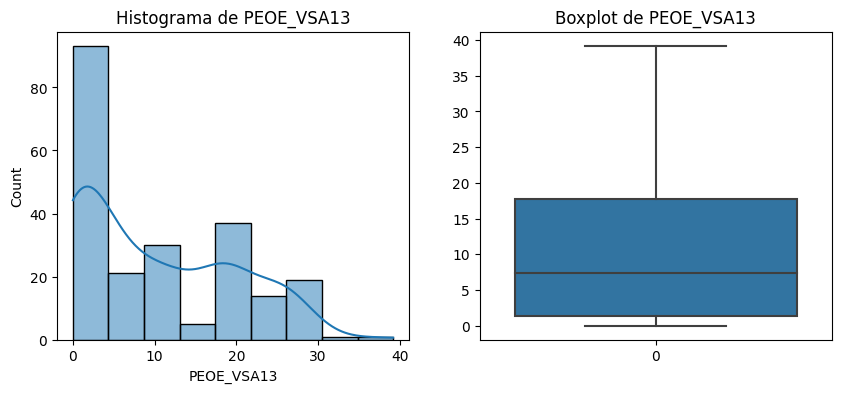

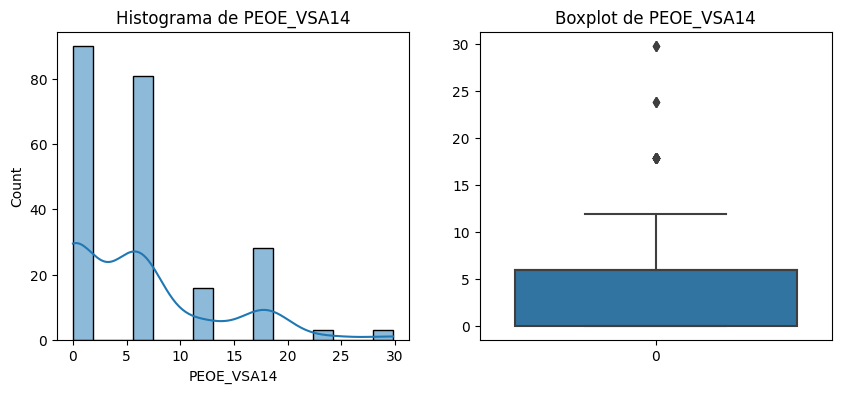

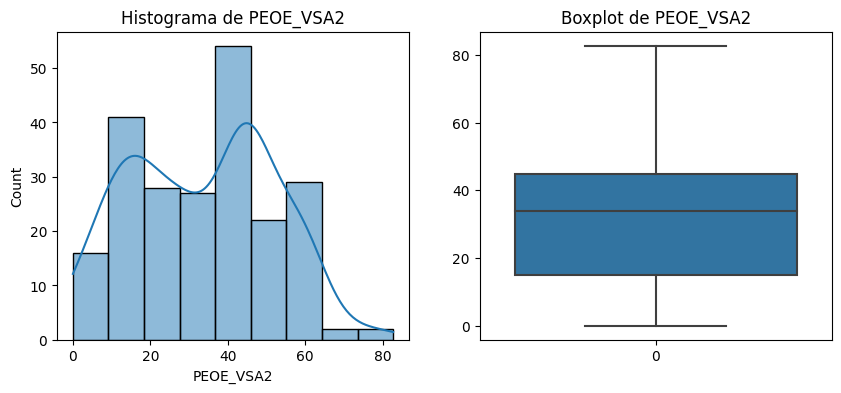

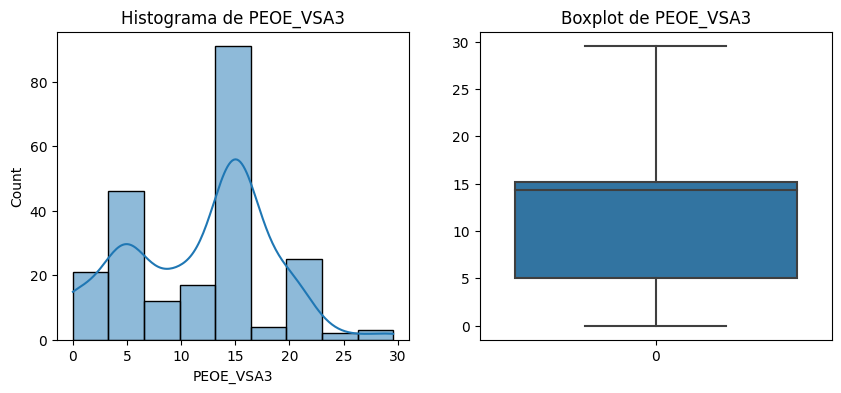

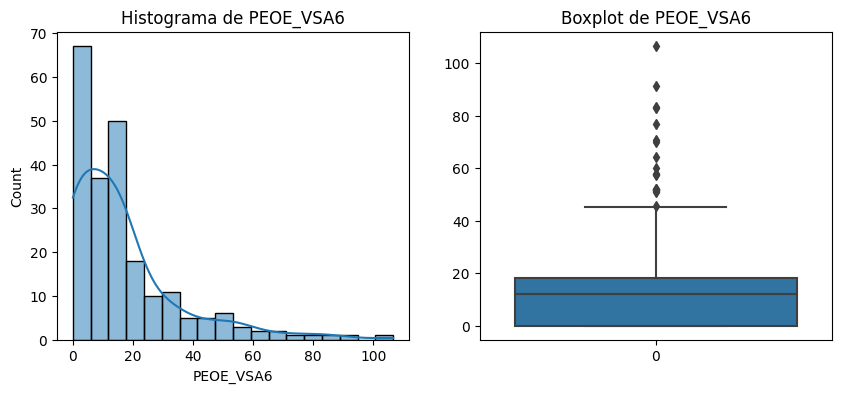

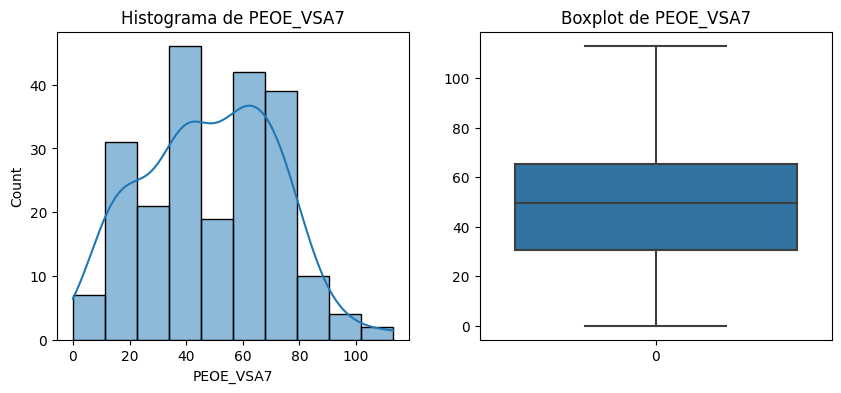

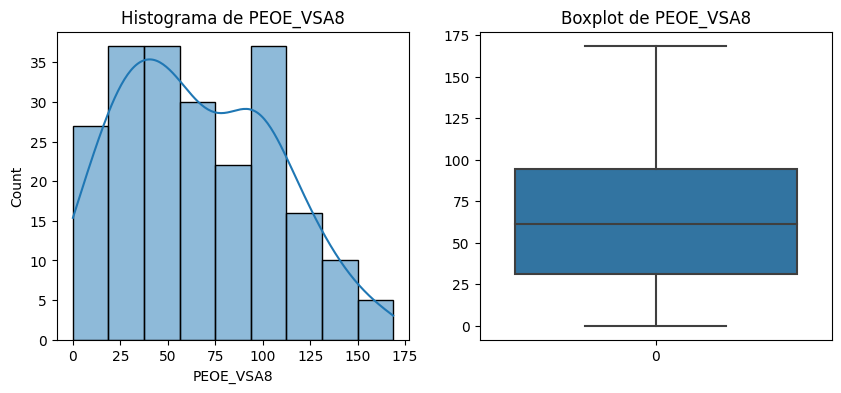

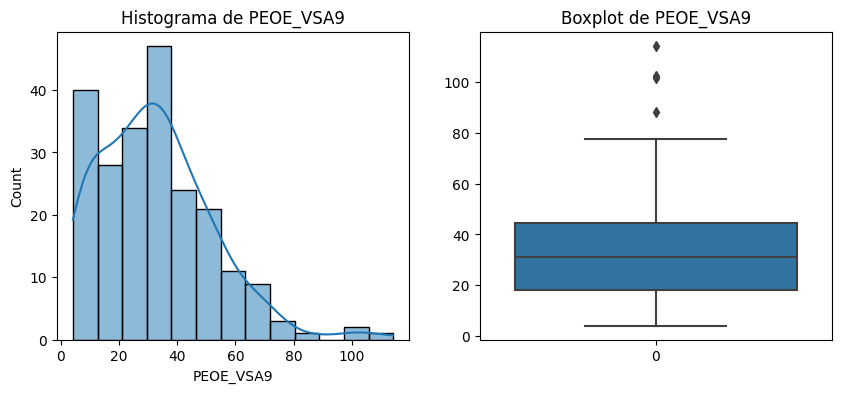

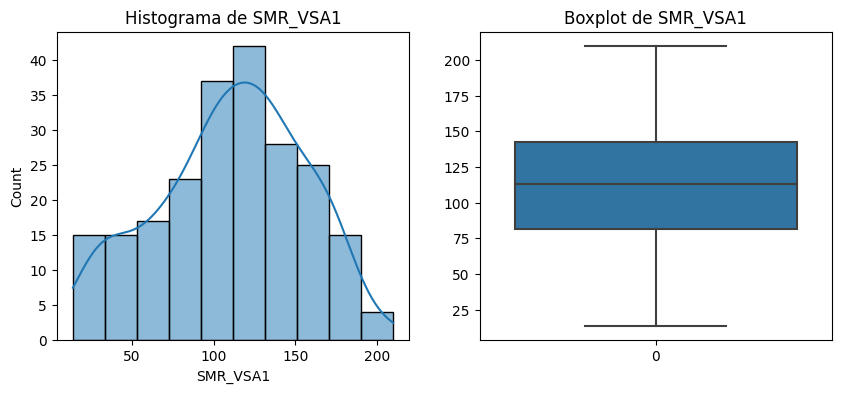

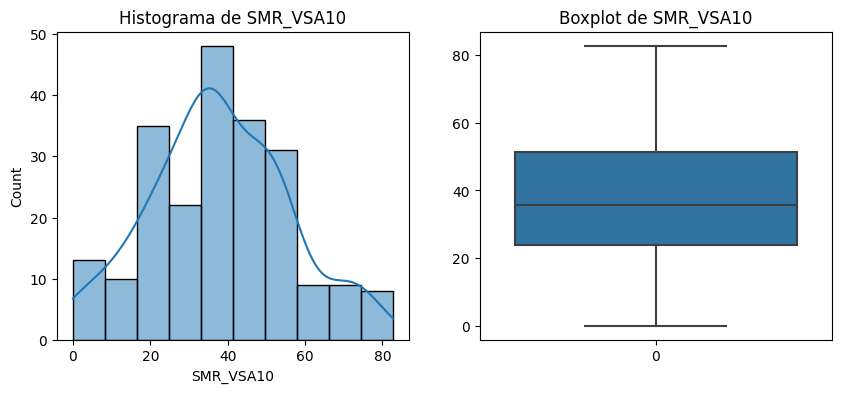

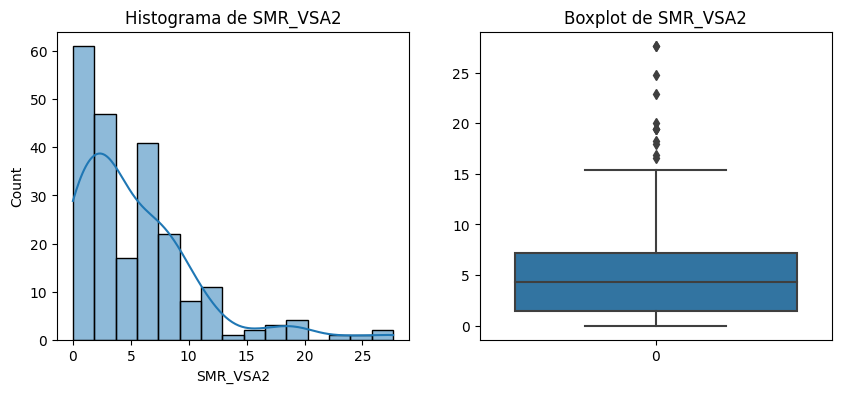

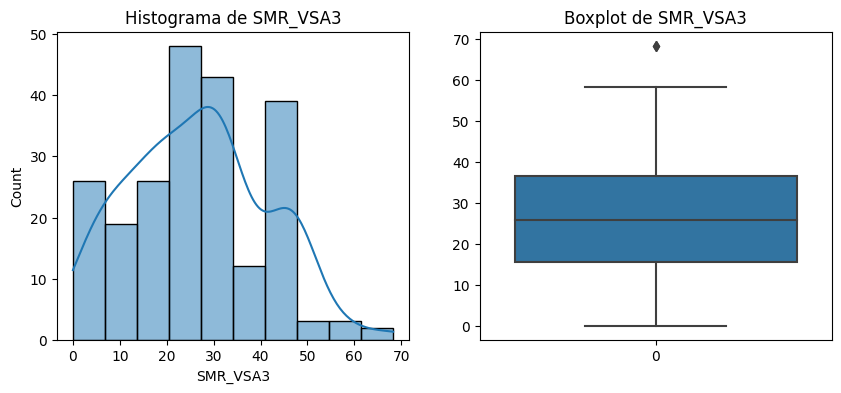

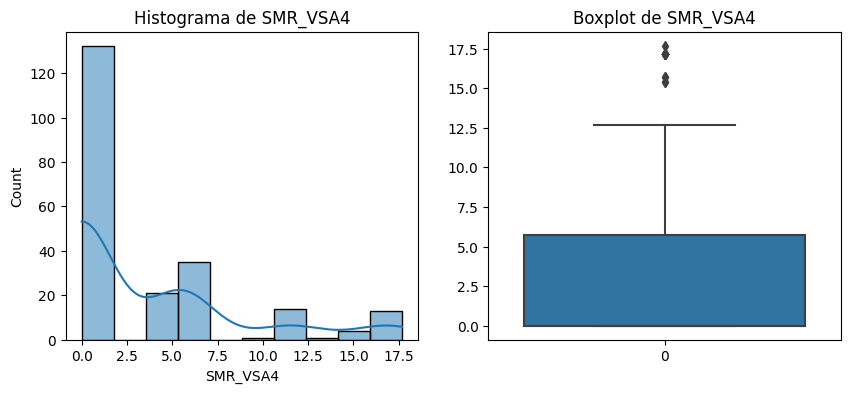

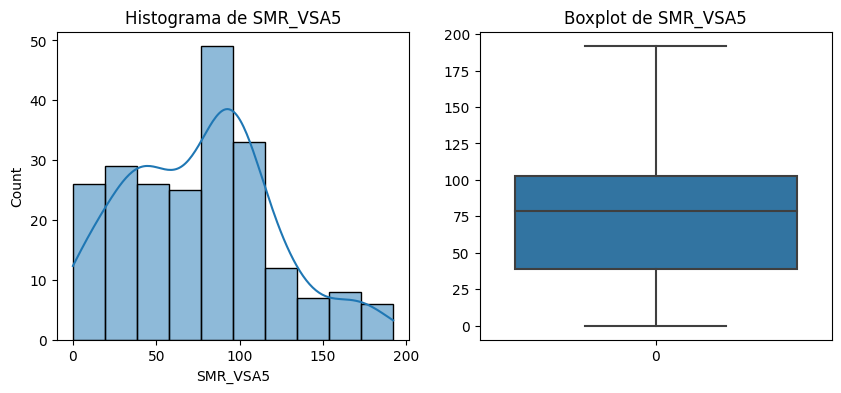

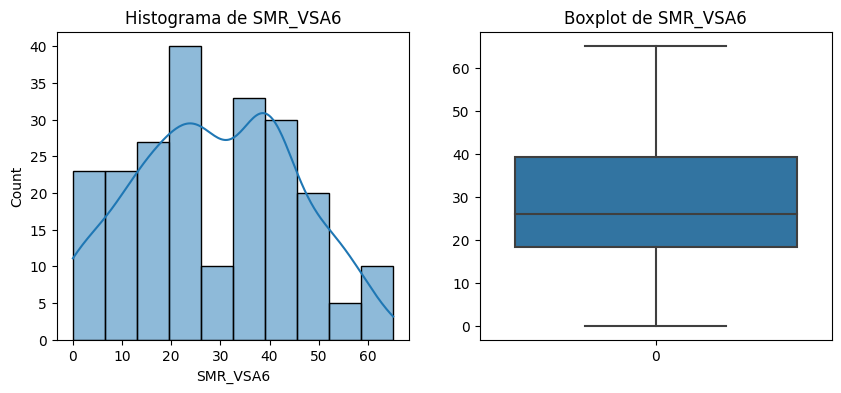

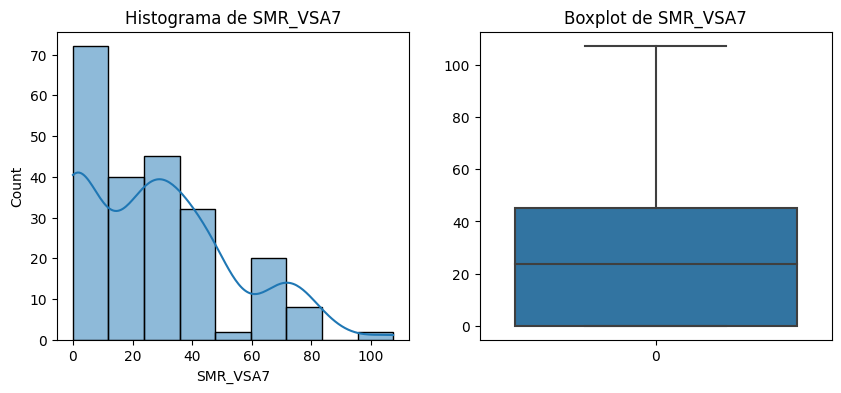

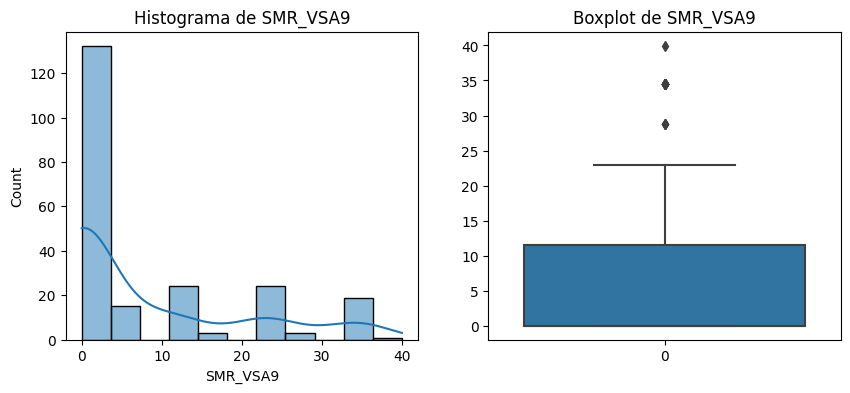

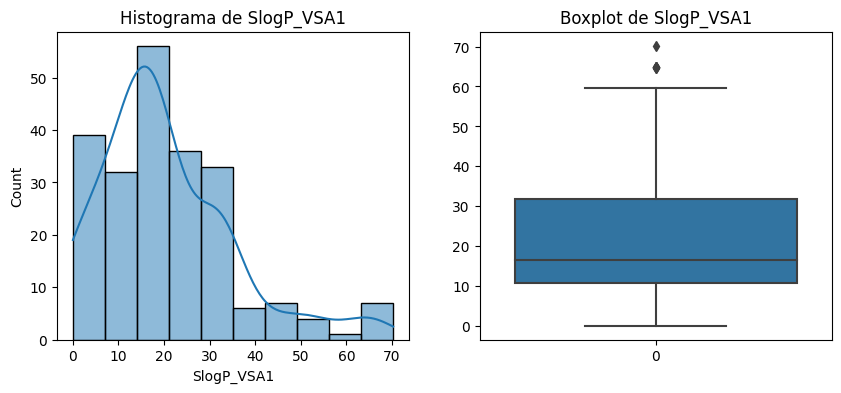

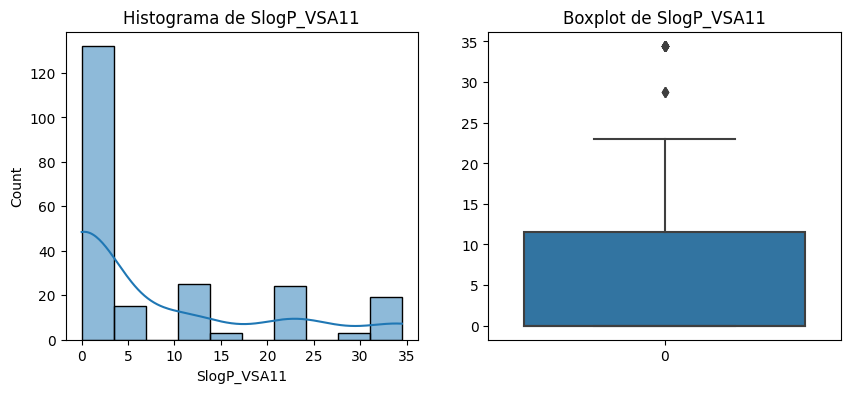

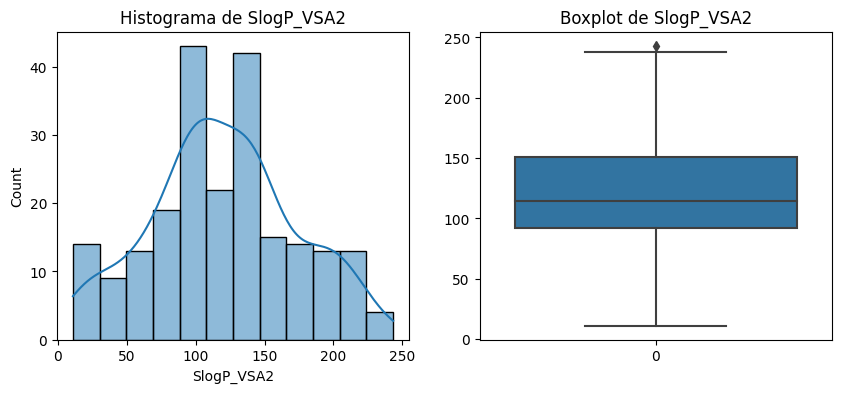

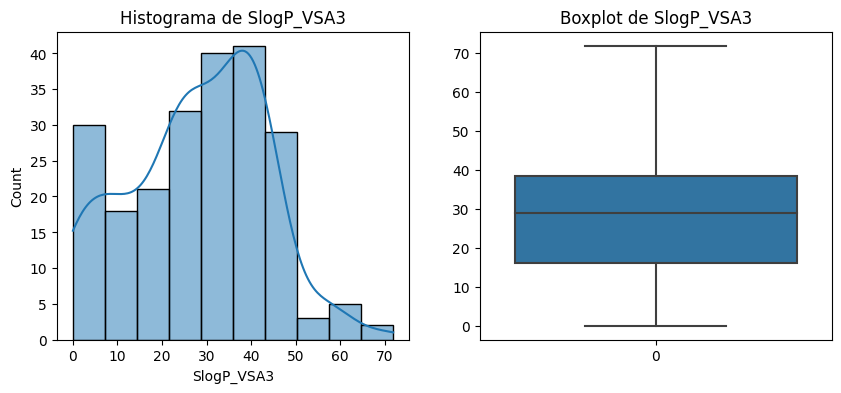

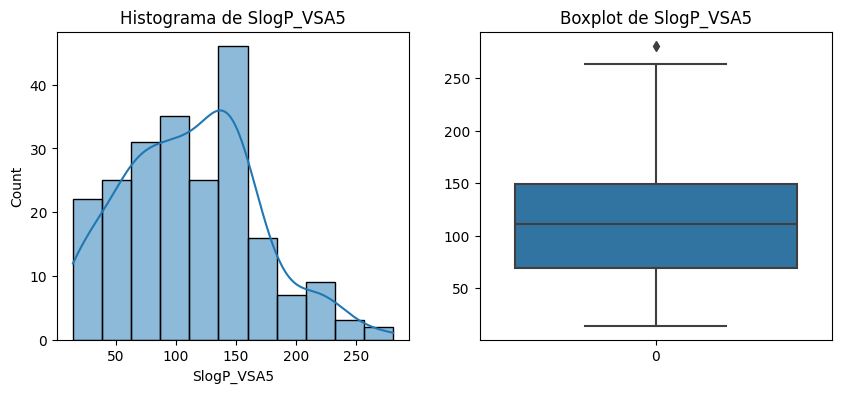

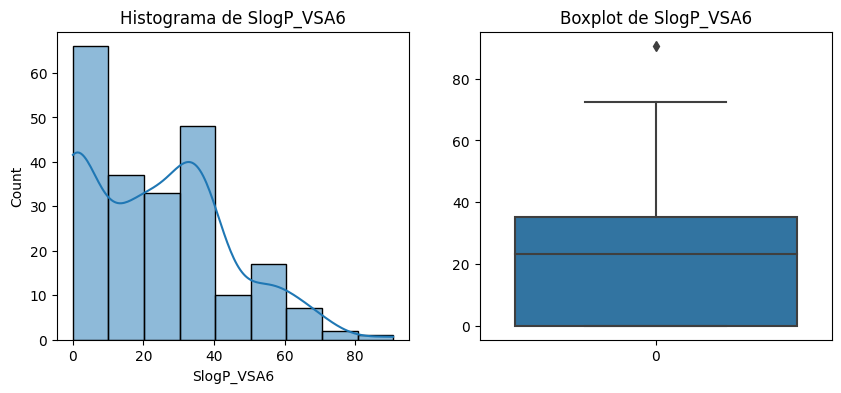

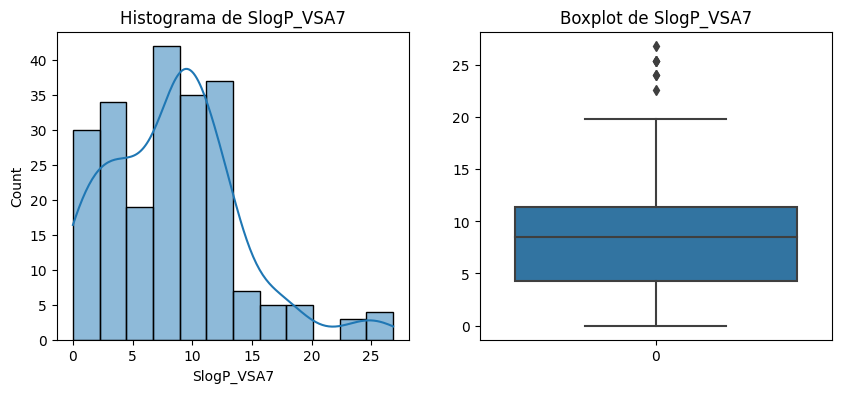

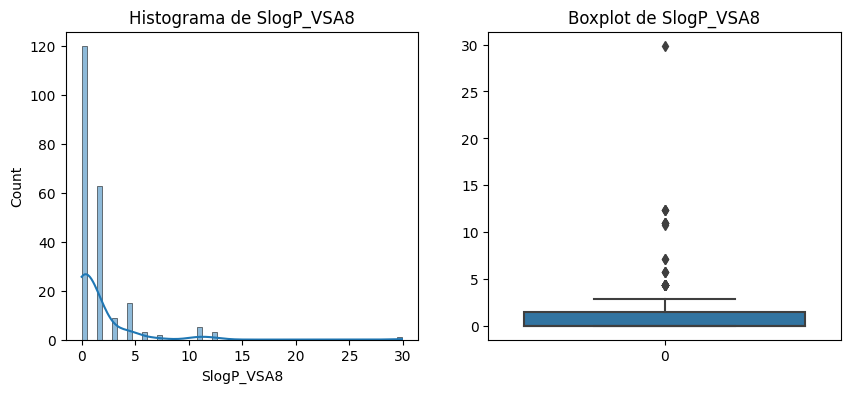

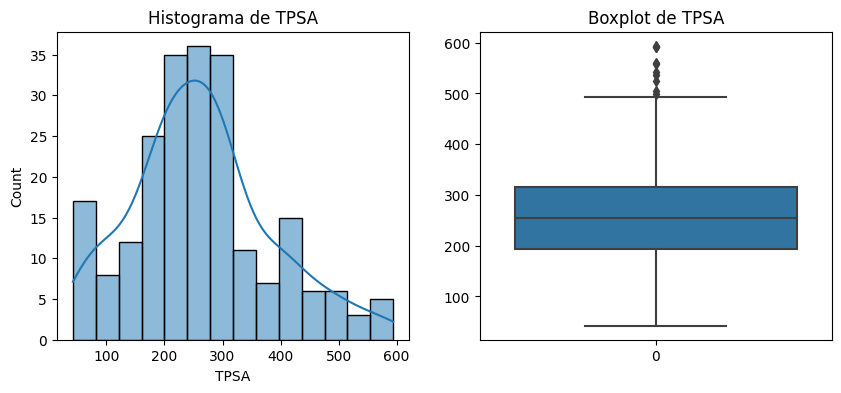

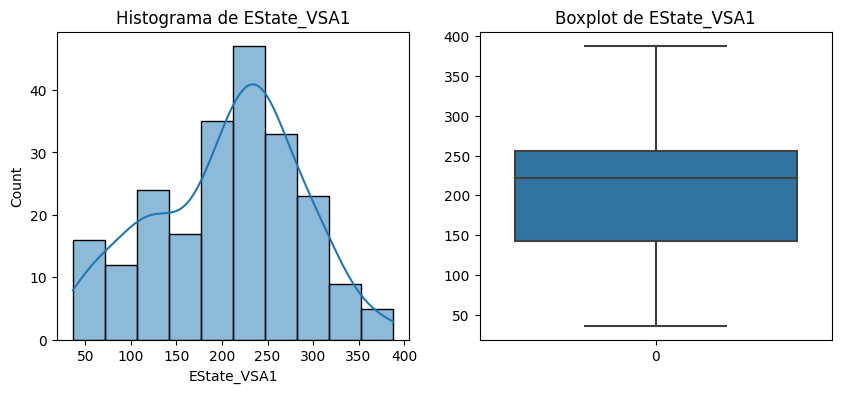

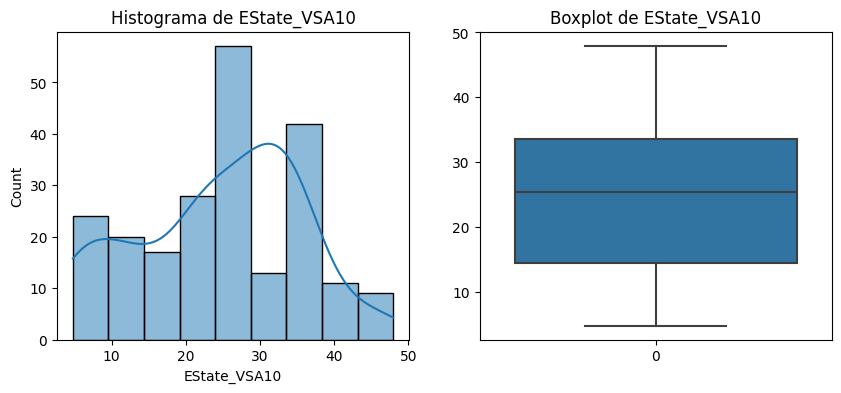

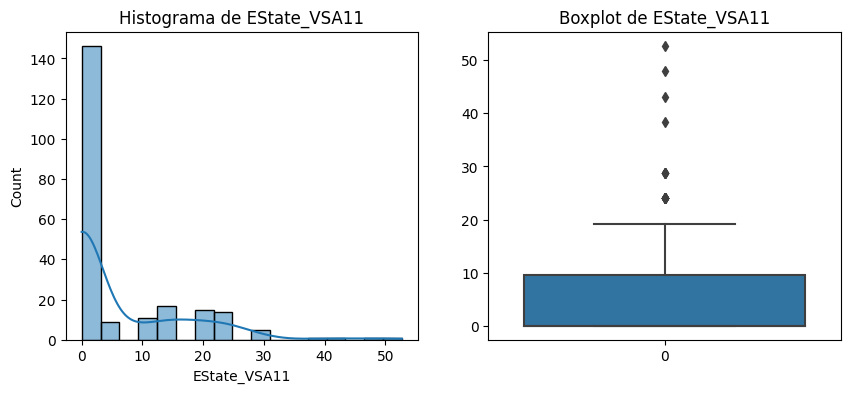

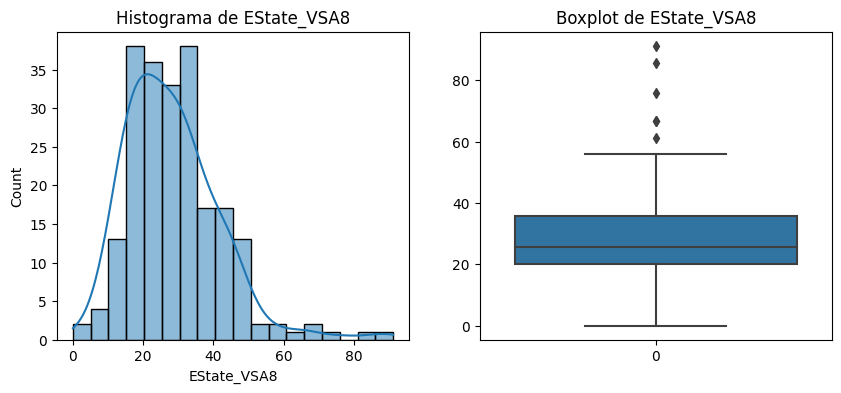

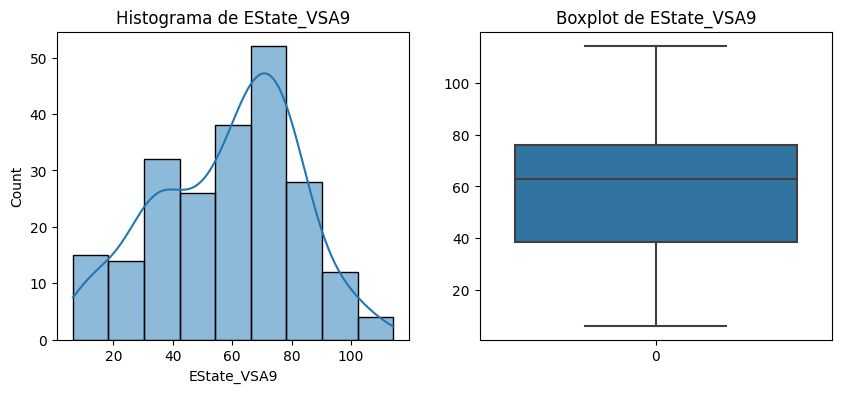

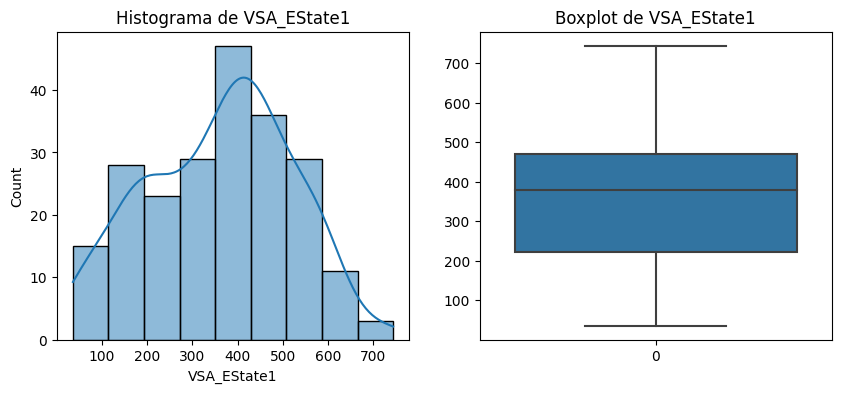

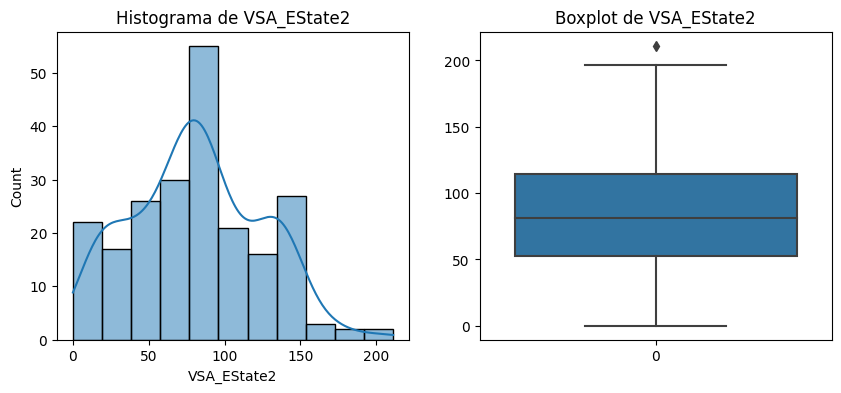

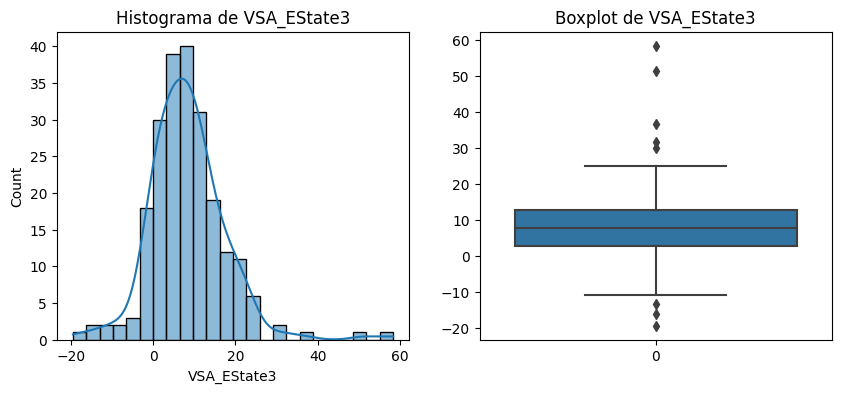

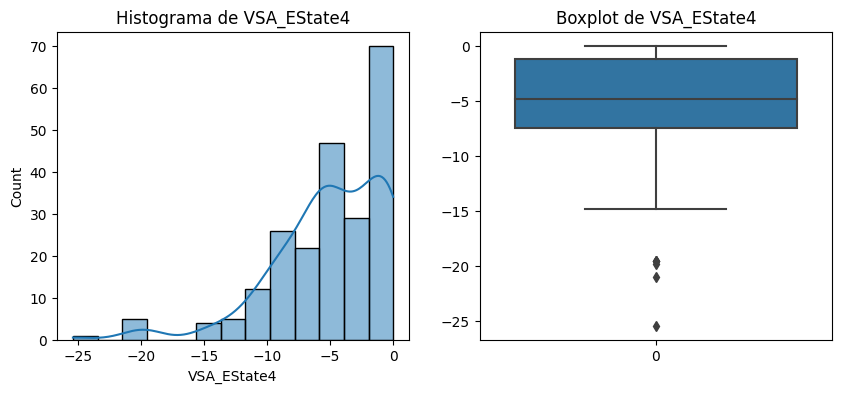

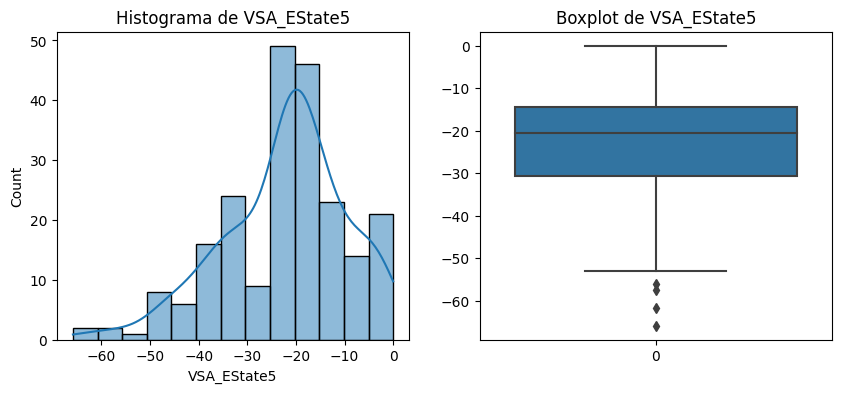

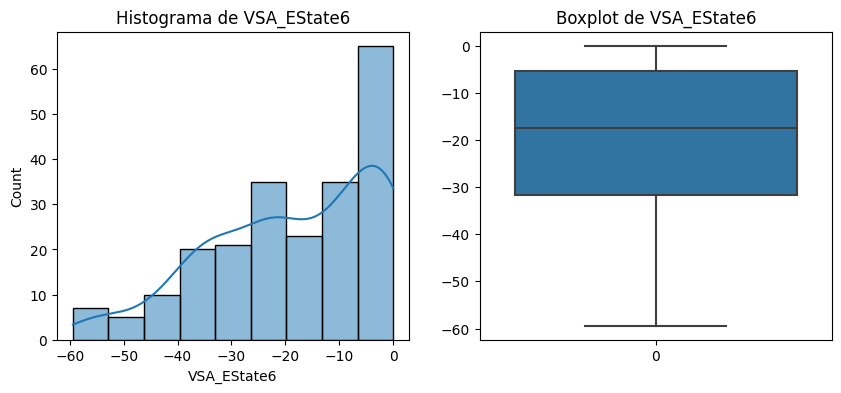

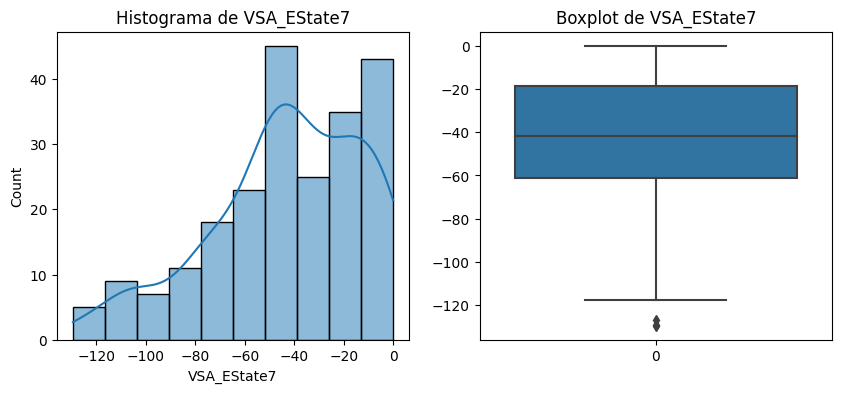

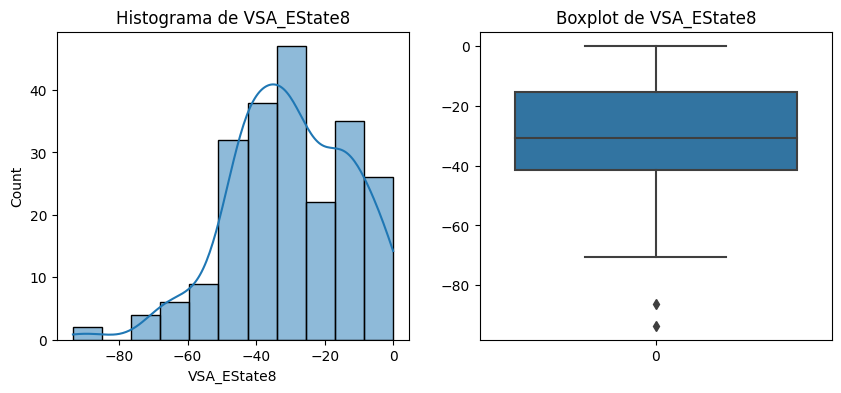

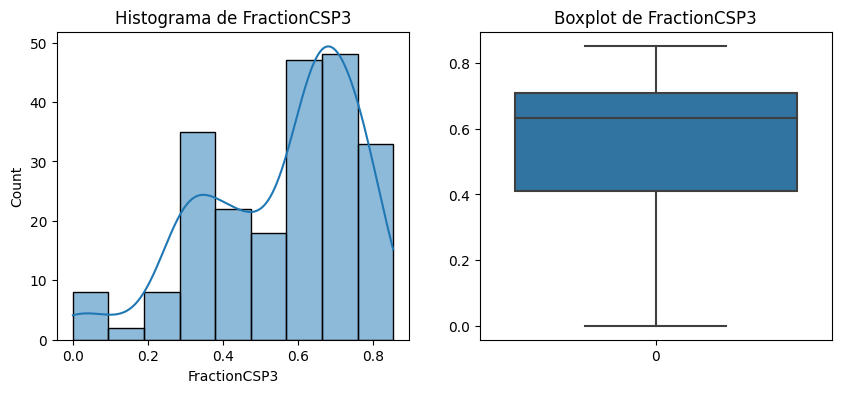

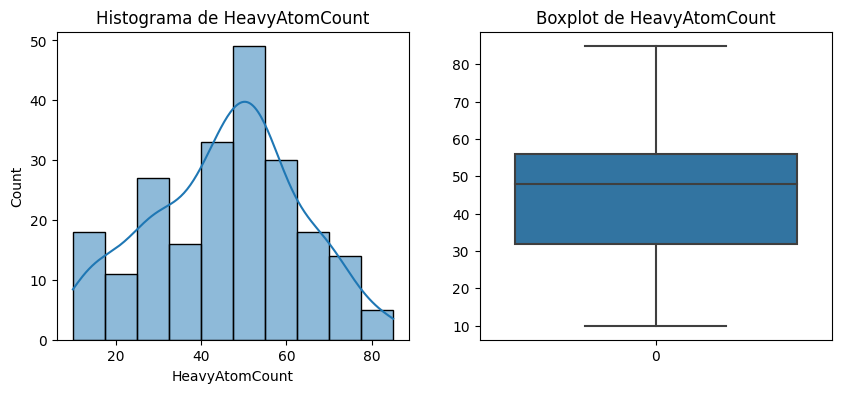

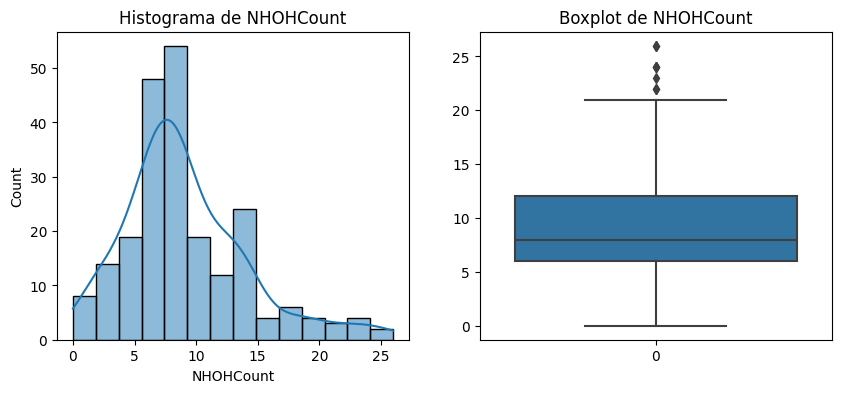

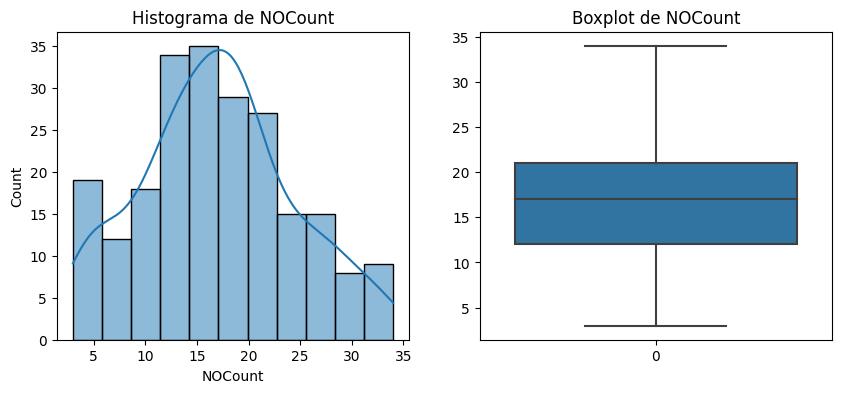

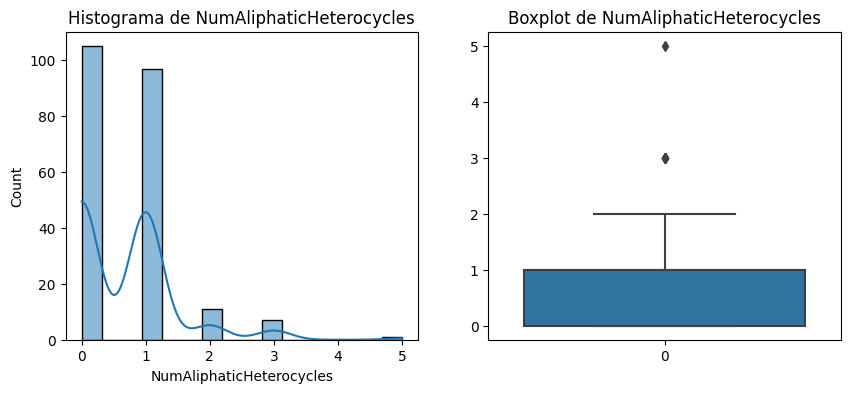

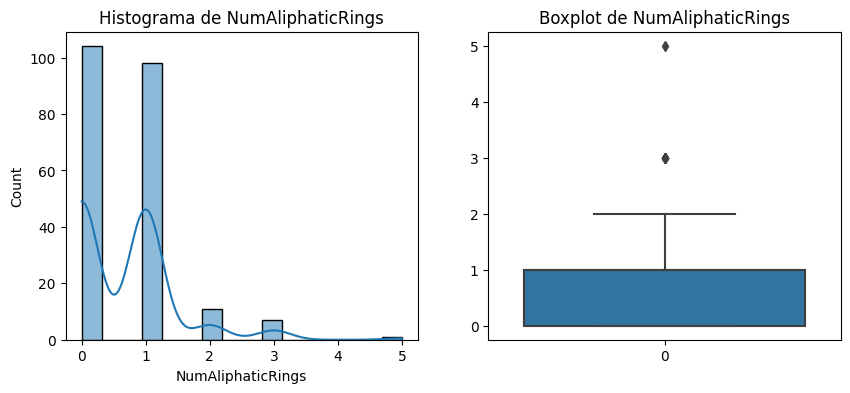

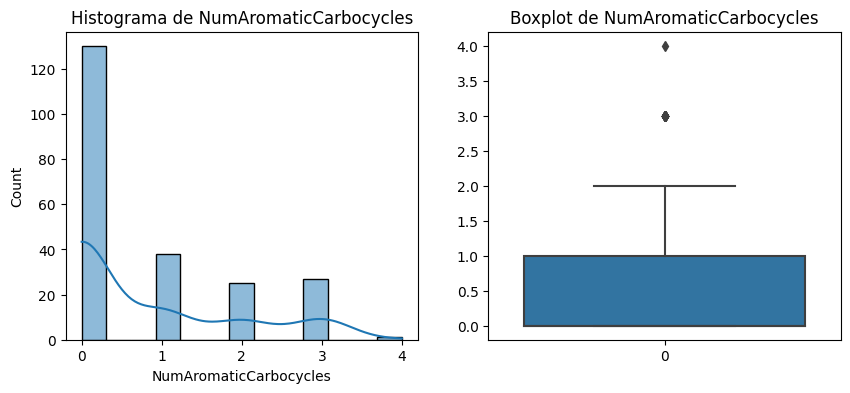

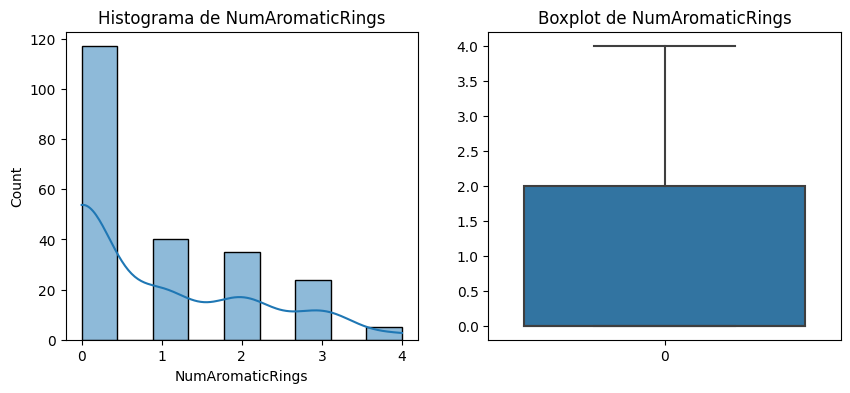

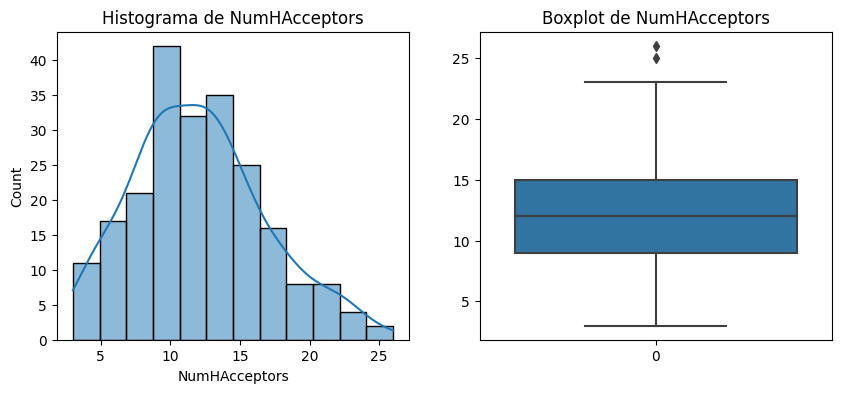

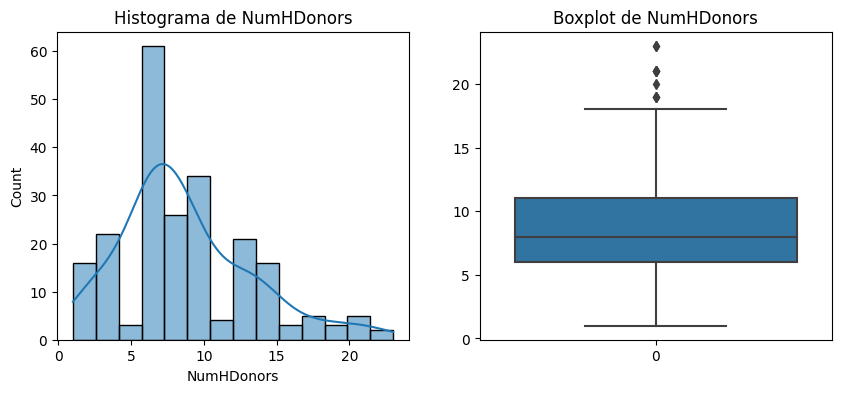

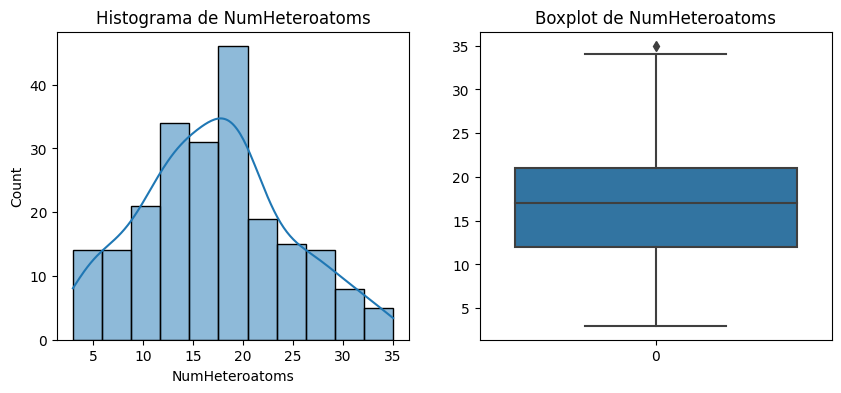

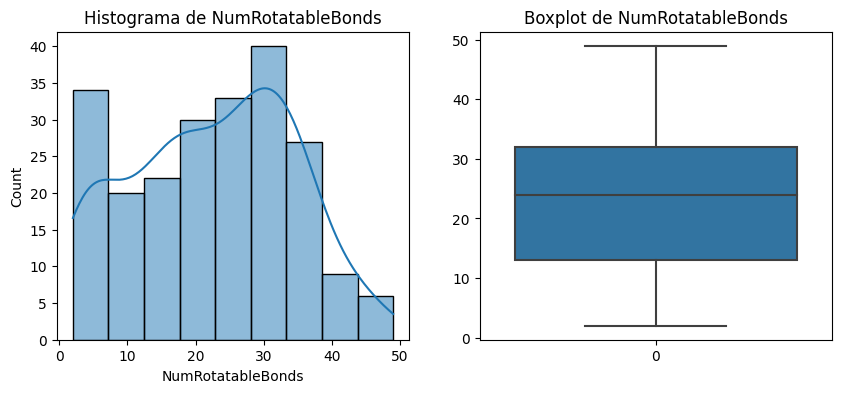

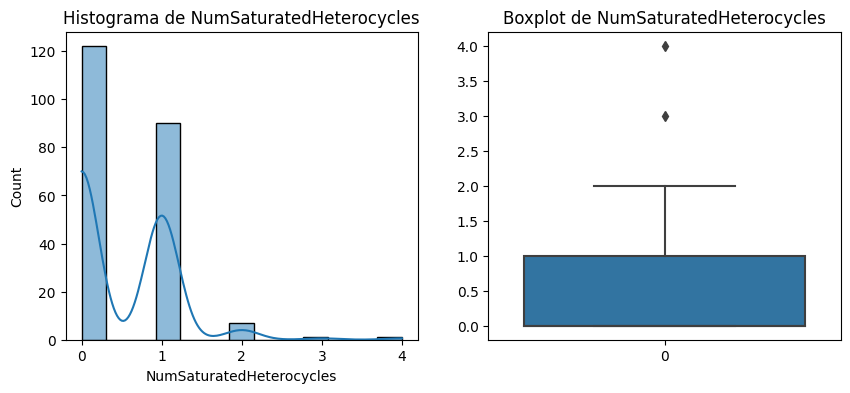

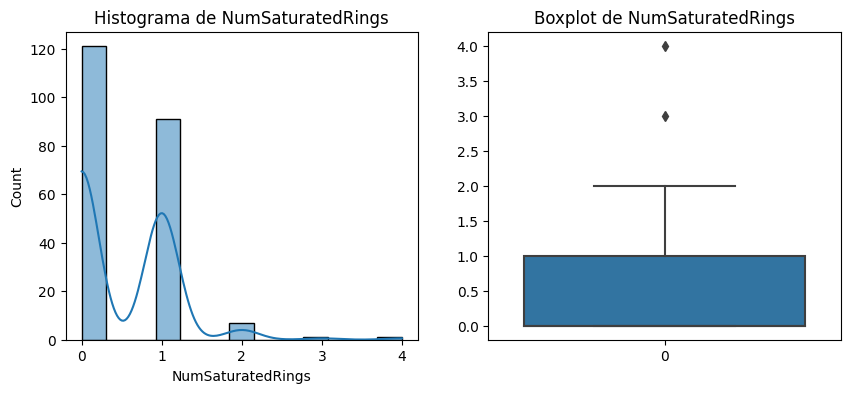

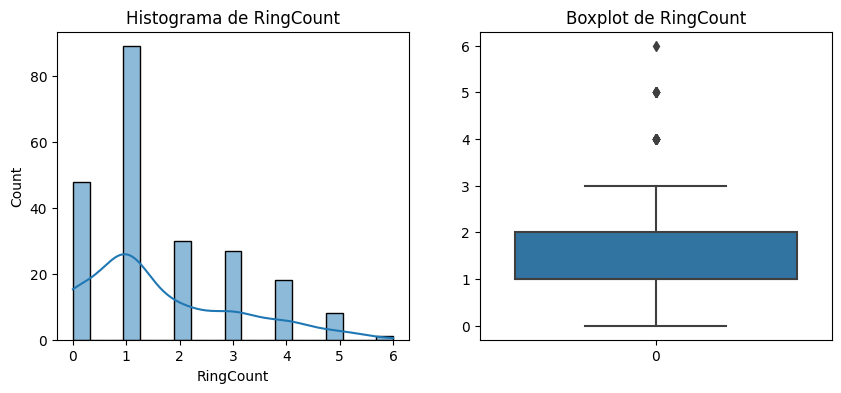

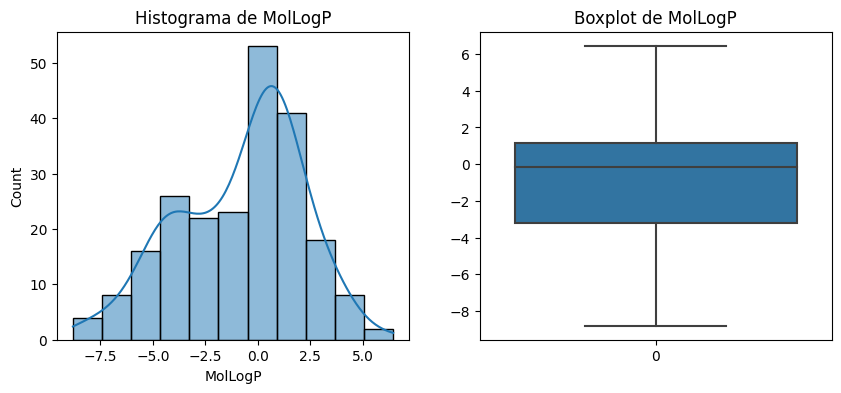

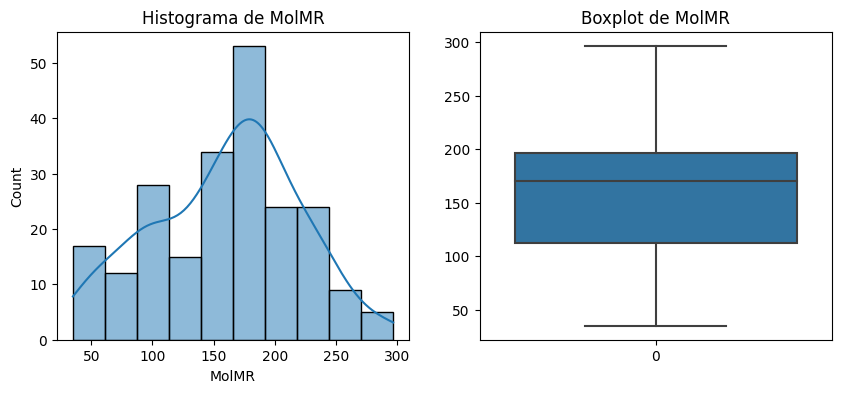

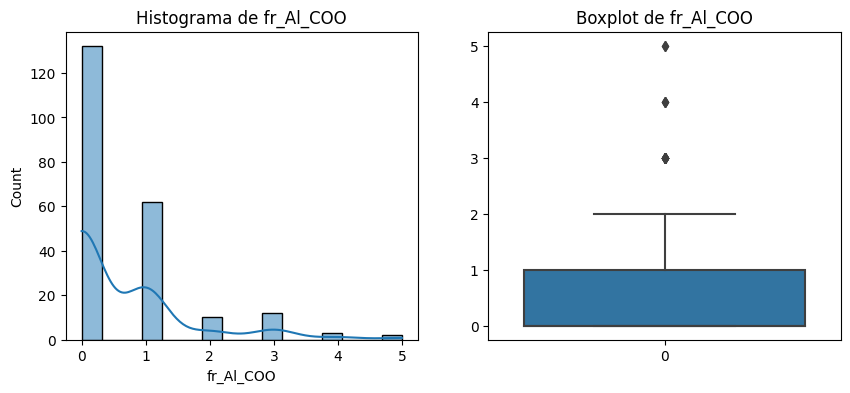

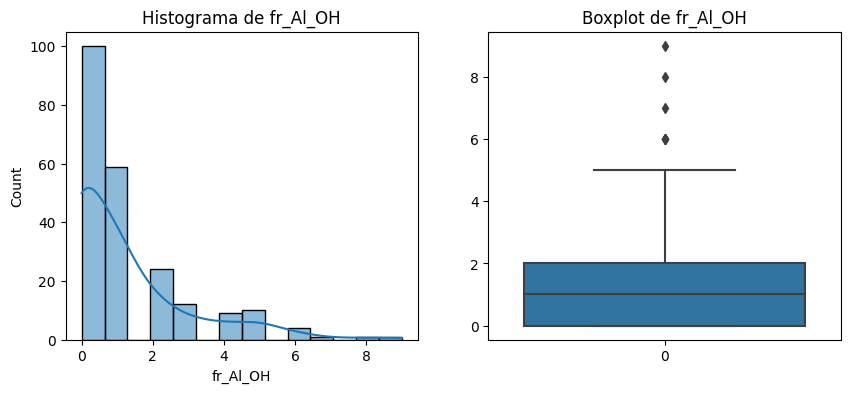

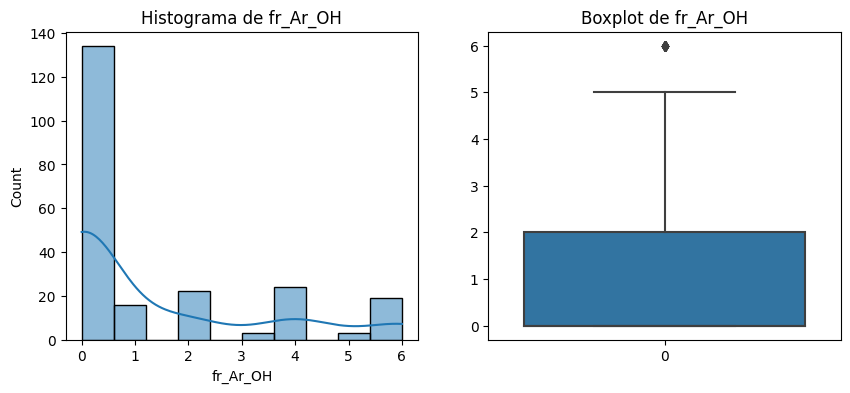

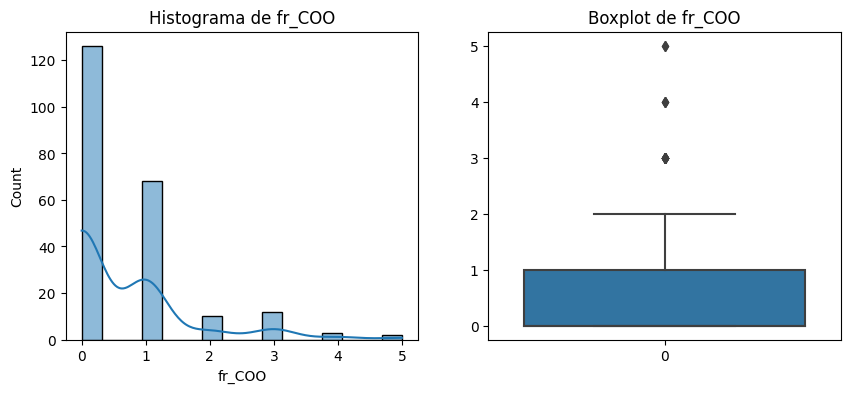

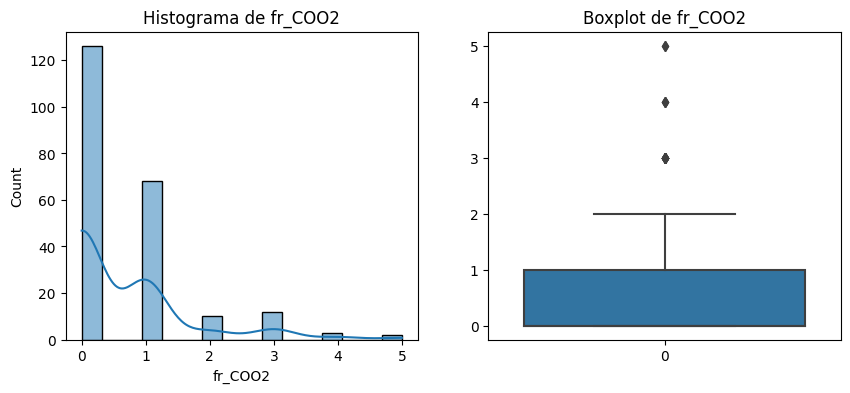

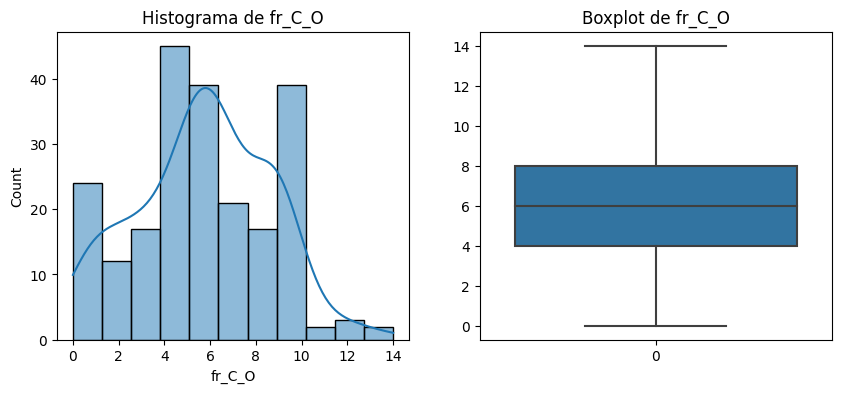

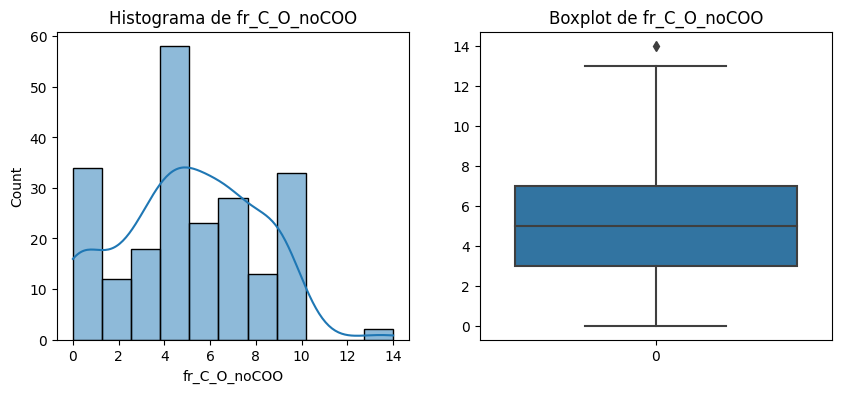

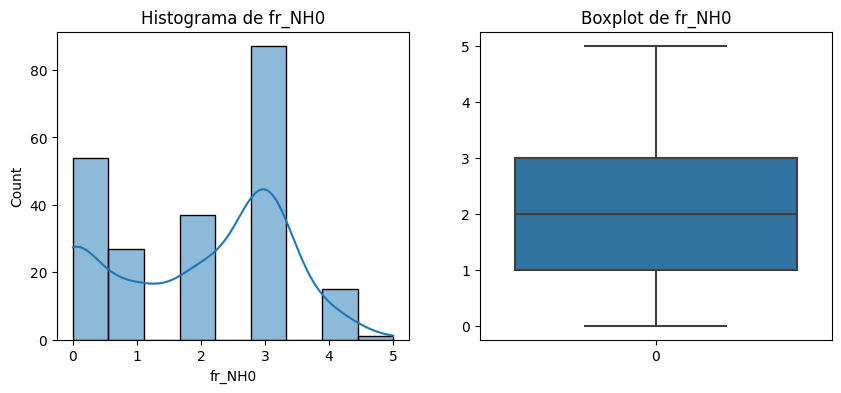

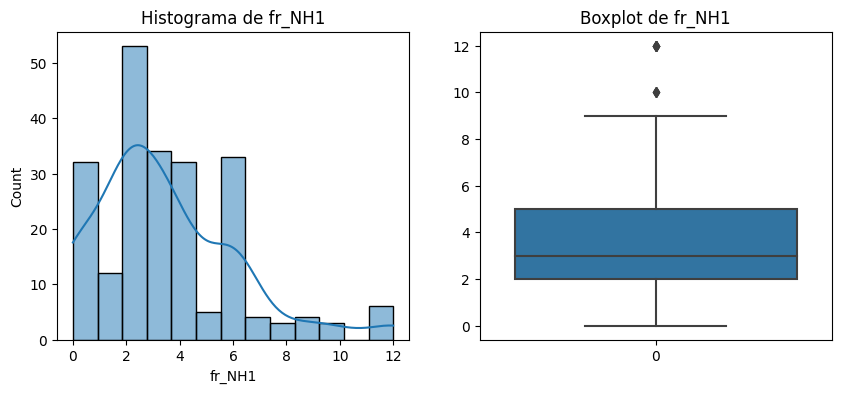

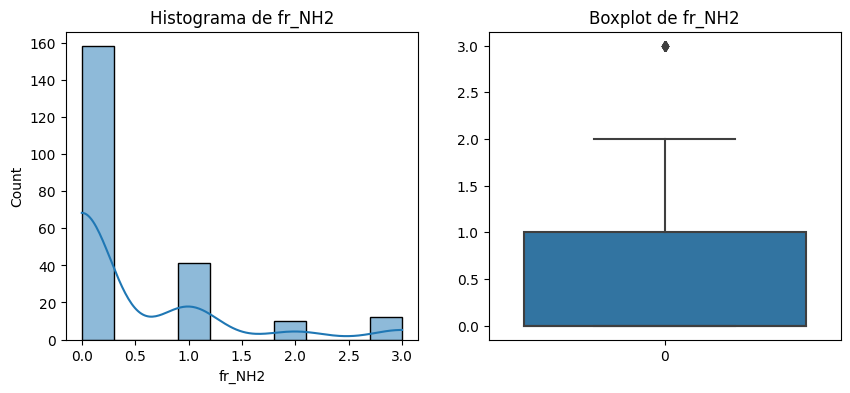

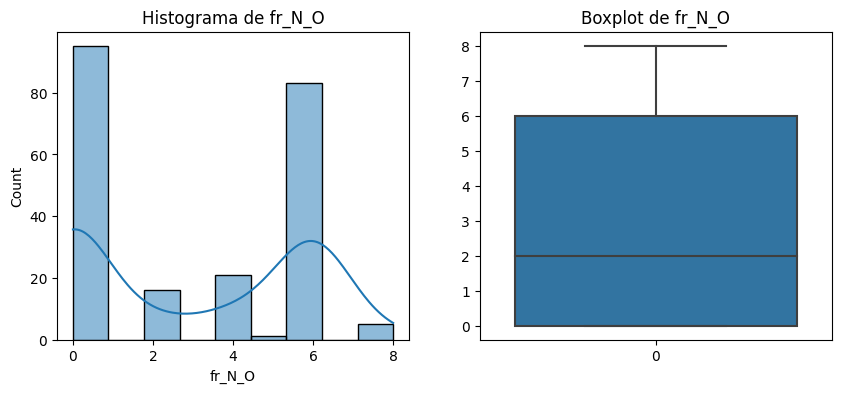

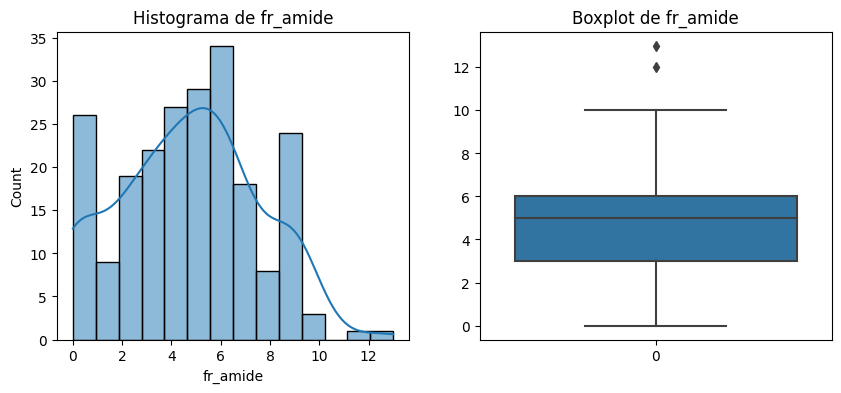

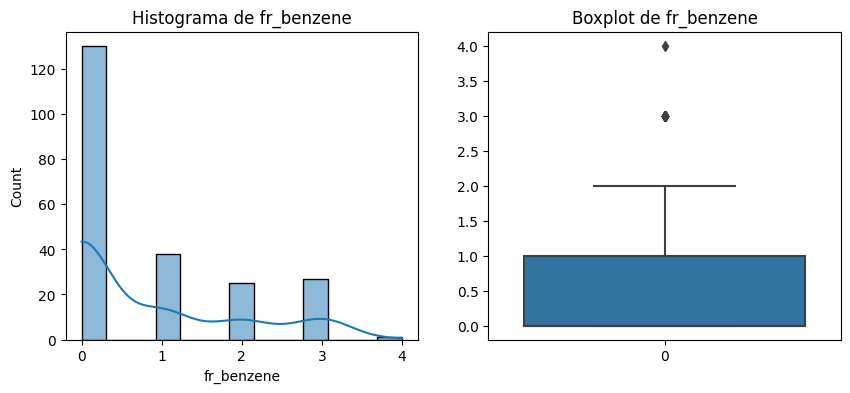

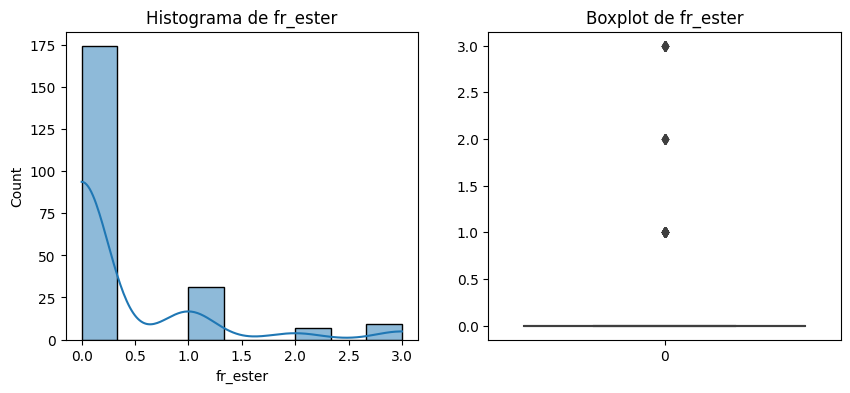

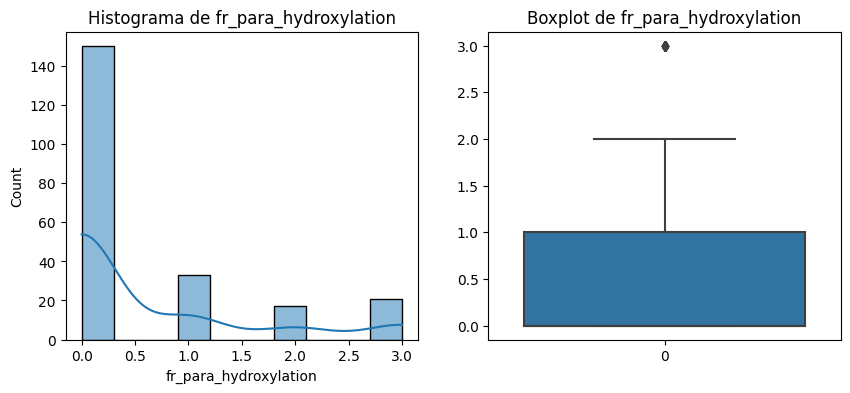

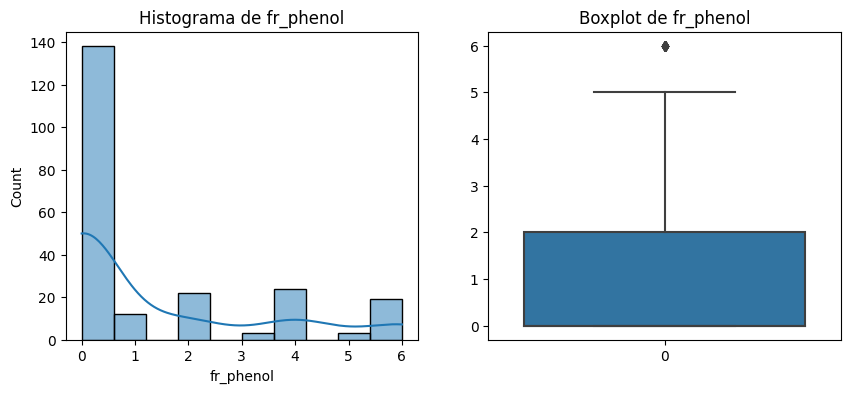

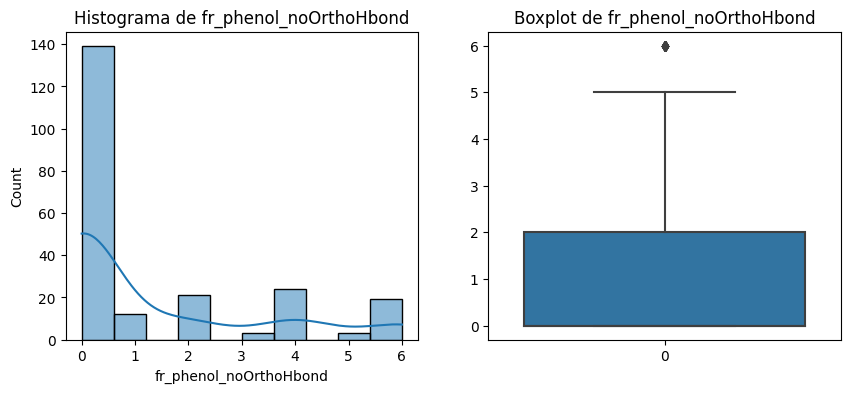

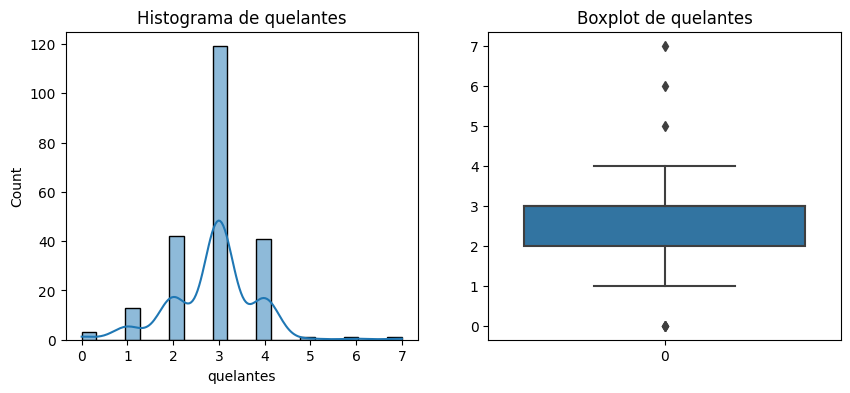

In [ ]:
# Graficar histogramas y boxplots de todas las variables
for column in df_total.drop('quelantes_categ', axis=1).columns:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    
    # Histograma
    sns.histplot(data=df_total[column], ax=axs[0], kde=True)
    axs[0].set_title(f"Histograma de {column}")
    
    # Boxplot
    sns.boxplot(data=df_total[column], ax=axs[1])
    axs[1].set_title(f"Boxplot de {column}")
    
    plt.show()

<Axes: >

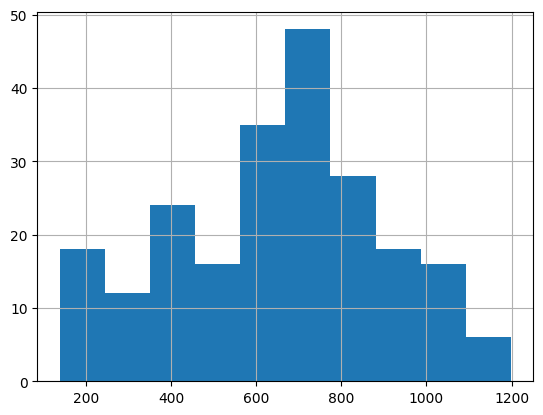

In [ ]:
df_total['MolWt'].hist()


<Axes: >

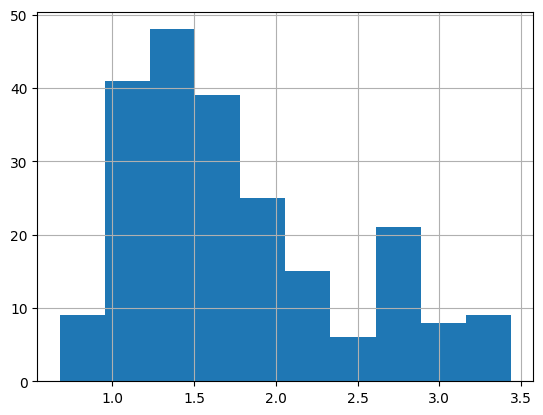

In [ ]:
df_total['FpDensityMorgan3'].hist()


<Axes: >

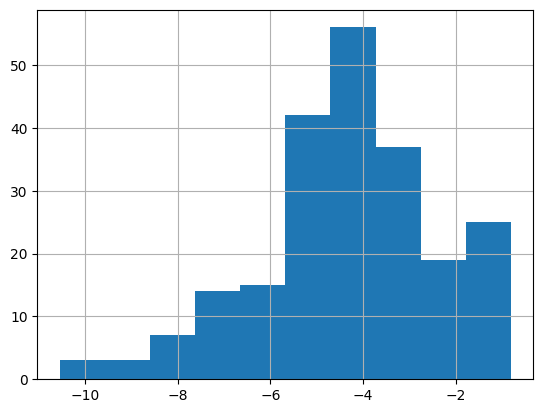

In [ ]:
df_total['HallKierAlpha'].hist()


<Axes: xlabel='quelantes_categ', ylabel='HeavyAtomMolWt'>

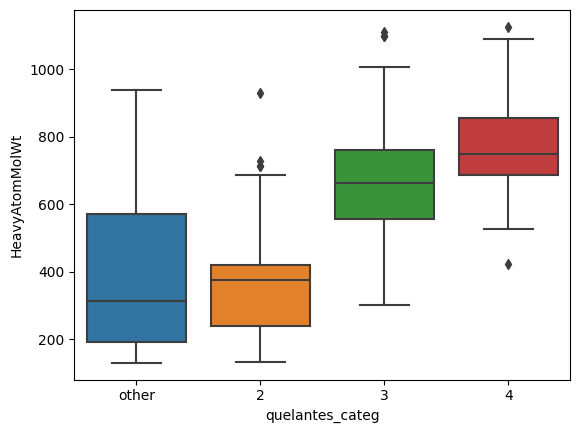

In [ ]:
import seaborn as sns
sns.boxplot(x='quelantes_categ', y='HeavyAtomMolWt', data=df_total)

<Axes: xlabel='quelantes_categ', ylabel='MolWt'>

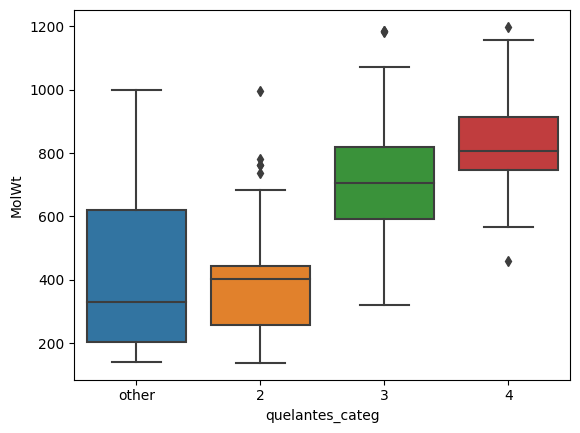

In [ ]:
import seaborn as sns
sns.boxplot(x='quelantes_categ', y='MolWt', data=df_total)

Ahora, revisamos la colinealidad para ver si podemos eliminar una cantidad de columnas significativa y así tener un dataset más optimizado

<ipython-input-51-4439fda915b5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_total.corr().abs()


(221, 48)


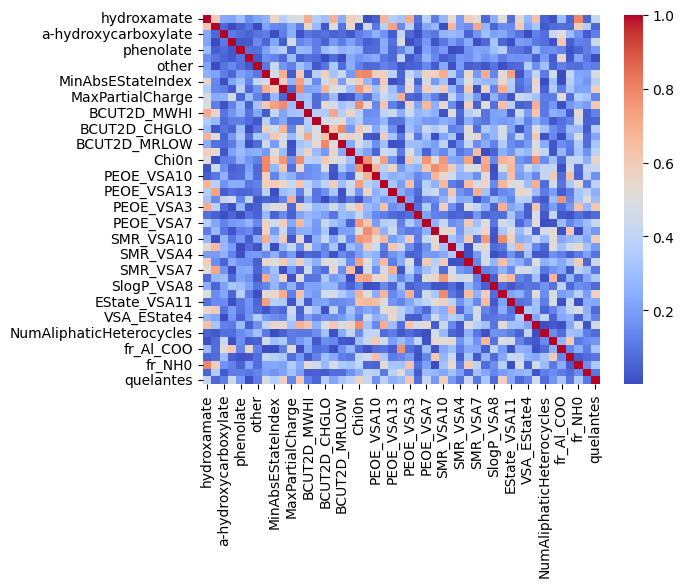

In [ ]:
#Colinealidad

# calcular la matriz de correlación entre todas las variables numéricas
corr_matrix = df_total.corr().abs()

# identificar pares de variables con alta correlación
high_corr = np.where(np.abs(corr_matrix) > 0.8)
high_corr = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

# eliminar una de las variables de cada par de alta correlación
to_drop = set()
for var1, var2 in high_corr:
    if var1 not in to_drop:
        to_drop.add(var2)

# eliminar las variables seleccionadas
df_total = df_total.drop(to_drop, axis=1)

# generar un mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, cmap='coolwarm')

print(df_total.shape)

# Entrenamiento

In [ ]:
df_total.columns

Index(['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate',
       'phenolate', 'citrate', 'other', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'qed', 'MaxPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWHI',
       'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'BCUT2D_MRHI', 'BCUT2D_MRLOW',
       'BalabanJ', 'Chi0n', 'Chi3n', 'PEOE_VSA10', 'PEOE_VSA12', 'PEOE_VSA13',
       'PEOE_VSA14', 'PEOE_VSA3', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA9',
       'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA4', 'SMR_VSA6', 'SMR_VSA7',
       'SlogP_VSA1', 'SlogP_VSA8', 'EState_VSA10', 'EState_VSA11',
       'VSA_EState3', 'VSA_EState4', 'VSA_EState7', 'NumAliphaticHeterocycles',
       'MolLogP', 'fr_Al_COO', 'fr_Al_OH', 'fr_NH0', 'fr_ester', 'quelantes',
       'quelantes_categ'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# crear instancia de OrdinalEncoder
encoder = OrdinalEncoder(categories=[['other', '2', '3', '4']])

# ajustar el encoder a las categorías existentes
encoder.fit(df_total[['quelantes_categ']])

# transformar la columna 'quelantes_categ'
df_total['quelantes_categ_encoded'] = encoder.transform(df_total[['quelantes_categ']])

df_total = df_total.drop(['quelantes_categ', 'quelantes', 'hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate',
       'phenolate', 'citrate', 'other'], axis = 1)

Training set y test set

In [ ]:
# Ahora que limpiamos los datos nulos 
# Debemos escoger que informacion sera el training set
 #Y cual sera el training set para testear
X = df_total.drop(['quelantes_categ_encoded'], axis = 1)
y = df_total['quelantes_categ_encoded']

In [ ]:
X.columns

Index(['MaxEStateIndex', 'MinAbsEStateIndex', 'qed', 'MaxPartialCharge',
       'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO',
       'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'Chi0n', 'Chi3n',
       'PEOE_VSA10', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA3',
       'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA9', 'SMR_VSA10', 'SMR_VSA2',
       'SMR_VSA4', 'SMR_VSA6', 'SMR_VSA7', 'SlogP_VSA1', 'SlogP_VSA8',
       'EState_VSA10', 'EState_VSA11', 'VSA_EState3', 'VSA_EState4',
       'VSA_EState7', 'NumAliphaticHeterocycles', 'MolLogP', 'fr_Al_COO',
       'fr_Al_OH', 'fr_NH0', 'fr_ester'],
      dtype='object')

Debido al EDA, apreciamos que las variables no tenían distribución normal y había presencia de outliers, por lo que elegimos un RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

MaxEStateIndex  MinAbsEStateIndex   qed  MaxPartialCharge  \
0             -1.75              -1.06  3.64              0.27   
1             -1.15              -1.19  3.64             -0.01   
2             -0.92              -0.90  3.01              0.09   
3             -0.79              -0.68  3.21              0.09   
4             -1.80              -1.12  4.33              0.27   
..              ...                ...   ...               ...   
216           -0.68              -1.99  3.81              0.08   
217            0.26              -2.13 -0.07              0.50   
218            0.26              -2.13 -0.07              0.50   
219            0.28              -2.11  0.08              0.50   
220            0.26              -2.13 -0.07              0.50   

     FpDensityMorgan1  BCUT2D_MWHI  BCUT2D_MWLOW  BCUT2D_CHGLO  BCUT2D_MRHI  \
0                1.97         0.23          2.72          9.75         1.88   
1                2.35         0.22          1.41          6.69         1.53   
2                2.21         0.15          1.39          4.15         1.11   
3                2.15         0.10          0.01          2.58         1.08   
4                2.35         0.15          2.69          9.96         1.84   
..                ...          ...           ...           ...          ...   
216              2.19         0.03         -0.03          5.15         1.25   
217              1.69         0.15          0.01         -1.80         1.49   
218              1.69         0.15          0.01         -1.80         1.49   
219              1.73         0.14         -0.03         -1.80         1.42   
220              1.69         0.15          0.01         -1.80         1.49   

     BCUT2D_MRLOW  ...  EState_VSA11  VSA_EState3  VSA_EState4  VSA_EState7  \
0            6.00  ...          0.00         0.38         0.66         0.99   
1            5.29  ...          0.00         0.31         0.60         0.99   
2            1.39  ...          0.00         0.65         0.58         0.99   
3            0.00  ...          0.00         0.66         0.56         0.90   
4            6.28  ...          0.00        -0.02         0.67         0.99   
..            ...  ...           ...          ...          ...          ...   
216          1.52  ...          0.00        -0.47        -0.88         0.78   
217         -6.71  ...          0.00         0.07        -2.37         0.76   
218         -6.71  ...          0.00         0.07        -2.37         0.76   
219         -6.71  ...          0.00        -0.37        -2.42         0.76   
220         -6.71  ...          0.00         0.07        -2.37         0.76   

     NumAliphaticHeterocycles  MolLogP  fr_Al_COO  fr_Al_OH  fr_NH0  fr_ester  
0                       -1.00     0.22       0.00     -0.50   -1.00      0.00  
1                       -1.00     0.02       1.00     -0.50   -1.00      0.00  
2                       -1.00    -0.13       1.00      0.00   -1.00      0.00  
3                       -1.00    -0.04       1.00      0.00   -1.00      0.00  
4                       -1.00     0.29       0.00     -0.50   -1.00      0.00  
..                        ...      ...        ...       ...     ...       ...  
216                     -1.00     0.82       0.00     -0.50    0.00      0.00  
217                      2.00     0.31       2.00     -0.50    1.00      0.00  
218                      2.00     0.31       2.00     -0.50    1.00      0.00  
219                      2.00     0.38       2.00     -0.50    1.00      0.00  
220                      2.00     0.31       2.00     -0.50    1.00      0.00  

[221 rows x 39 columns]

Probamos un LazyClassifier

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=.2,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  3%|▎         | 1/29 [00:00<00:03,  7.36it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:00<00:02,  8.72it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 48%|████▊     | 14/29 [00:00<00:00, 19.41it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 59%|█████▊    | 17/29 [00:01<00:00, 18.62it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:01<00:00, 21.04it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:01<00:00, 15.93it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LabelSpreading                     0.78               0.79    None      0.78   
LabelPropagation                   0.78               0.79    None      0.78   
LogisticRegression                 0.73               0.69    None      0.74   
SVC                                0.80               0.69    None      0.78   
RandomForestClassifier             0.78               0.68    None      0.76   
BaggingClassifier                  0.78               0.68    None      0.77   
ExtraTreesClassifier               0.78               0.68    None      0.76   
KNeighborsClassifier               0.78               0.68    None      0.76   
LinearDiscriminantAnalysi

Ahora, probamos diversos clasificadores vistos en clase

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn import tree, neighbors, semi_supervised, ensemble, discriminant_analysis
from sklearn import svm, linear_model, neural_network

# dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# crear un pipeline para estandarizar los datos y entrenar el modelo
pipe = Pipeline([('scaler', RobustScaler()), ('model', None)])

# diccionario con los modelos que queremos probar
models = {'BernoulliNB': BernoulliNB(),
          'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
          'ExtraTreeClassifier': tree.ExtraTreeClassifier(),
          'ExtraTreesClassifier': ensemble.ExtraTreesClassifier(),
          'GaussianNB': GaussianNB(),
          'KNeighborsClassifier': neighbors.KNeighborsClassifier(),
          'LabelPropagation': semi_supervised.LabelPropagation(),
          'LabelSpreading': semi_supervised.LabelSpreading(),
          'LinearDiscriminantAnalysis': discriminant_analysis.LinearDiscriminantAnalysis(),
          'LinearSVC': svm.LinearSVC(multi_class='crammer_singer'),
          'LogisticRegression': linear_model.LogisticRegression(multi_class='multinomial'),
          'LogisticRegressionCV': linear_model.LogisticRegressionCV(multi_class='multinomial'),
          'MLPClassifier': neural_network.MLPClassifier(),
          'NearestCentroid': neighbors.NearestCentroid(),
          'QuadraticDiscriminantAnalysis': discriminant_analysis.QuadraticDiscriminantAnalysis(),
          'RandomForestClassifier': ensemble.RandomForestClassifier(),
          'RidgeClassifier': linear_model.RidgeClassifier(),
          'RidgeClassifierCV': linear_model.RidgeClassifierCV()
          }

# probar cada modelo y guardar el resultado en un diccionario
results = {}
for name, model in models.items():
    pipe.set_params(model=model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {'accuracy': acc, 'classification_report': report}

# imprimir los resultados
for name, result in results.items():
    print(name + ':')
    print('Accuracy:', result['accuracy'])
    print('Classification Report:\n', result['classification_report'])

BernoulliNB:
Accuracy: 0.582089552238806
Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.22      0.27         9
         1.0       0.44      0.70      0.54        10
         2.0       0.77      0.63      0.70        38
         3.0       0.43      0.60      0.50        10

    accuracy                           0.58        67
   macro avg       0.49      0.54      0.50        67
weighted avg       0.61      0.58      0.59        67

DecisionTreeClassifier:
Accuracy: 0.6865671641791045
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.22      0.33         9
         1.0       0.44      0.40      0.42        10
         2.0       0.82      0.82      0.82        38
         3.0       0.53      0.90      0.67        10

    accuracy                           0.69        67
   macro avg       0.61      0.58      0.56        67
weighted avg       0.70      0.69      0.67